 <h1><center>Cas mining summary and data exploration + new Cas9 example</center></h1>


## 1. Preliminary Data Exploration
- ### 1.1 Total number of CRISPR/Cas elements found
- ### 1.2 Data exploration per datasets
- ### 1.3 Data exploration per SGBs

## 2. Cas9 Mining Example: cibiobacter
- ### 2.1 Looking for Cas9 inside cibiobacter genomes
- ### 2.2 retrieving the sequence
- ### 2.3 Cas9 Sequence from one _cibiobacter_ genome
- ### 2.4 Extracting Cas9 for all the 23 cibiobacter genomes and alligning them to get a cibiobacter cas9 consensus sequence
- ### 2.5 Consensus sequence for _cibiobacter_ cas9
- ### 2.6 Comparison between _cibiobacter_ and Streptococcus pyogenes Cas9


<div style="text-align: right">Lorenzo federico Signorini, 16/07/2019</div>

<div style="text-align: right">Università degli studi di Trento</div>


# 1. Preliminary Data Exploration


In [1]:
# First created Thu Jul 11 09:51:15 CEST 2019
# Made by L-F-S
# At the University Of Trento, Italy

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO



sys.path.insert(0, '/home/lorenzo.signorini/utils/')
import filename_discrepancies


dataset="ZellerG_2014" #sys.argv[1] #TODO switch test dataset
tabledir="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/3tabellazza" 
CRISPRdir="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/1crisprsearch/out"
annodir="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/2casanno/crisprcasanno"
datadir="/shares/CIBIO-Storage/CM/scratch/tmp_projects/signorini_cas/"


ModuleNotFoundError: No module named 'filename_discrepancies'

In [3]:
DF=pd.read_csv(tabledir+"/crisprcas_hits_table.csv", index_col=0)

In [4]:
print(DF.columns)
print(DF.shape)

Index(['Unnamed: 0.1', 'Genome Name', 'Study', 'Sample Name', 'Assembler',
       'Genome Size', 'N50', '# Contigs', 'Completeness', 'Contamination',
       'Strain Heterogeneity', 'SGB ID', 'pilercr_CRISPR', 'minced_CRISPR',
       'prokka_CRISPR', 'prokka_cas', 'uniref_cas'],
      dtype='object')
(154723, 17)


In [5]:
print(DF.head(3))

   Unnamed: 0.1                           Genome Name          Study  \
0             0  AsnicarF_2017__MV_FEI1_t1Q14__bin.10  AsnicarF_2017   
1             1   AsnicarF_2017__MV_FEI1_t1Q14__bin.2  AsnicarF_2017   
2             2   AsnicarF_2017__MV_FEI1_t1Q14__bin.4  AsnicarF_2017   

     Sample Name   Assembler  Genome Size    N50  # Contigs  Completeness  \
0  MV_FEI1_t1Q14  metaSPAdes      2013732   6532        403     84.646697   
1  MV_FEI1_t1Q14  metaSPAdes      1849520   3104        616     64.746589   
2  MV_FEI1_t1Q14  metaSPAdes      1962642  40866         87     93.894009   

   Contamination  Strain Heterogeneity  SGB ID pilercr_CRISPR minced_CRISPR  \
0       1.651306              1.458714   17248            NaN           NaN   
1       0.877193              0.197712    4584            NaN           NaN   
2       0.937020              0.403549   17256            NaN           NaN   

  prokka_CRISPR prokka_cas uniref_cas  
0           NaN        NaN        NaN  
1    

In [6]:
crisprdf=DF[[DF.columns[1], DF.columns[2], DF.columns[12], DF.columns[13], DF.columns[14], DF.columns[15], DF.columns[16]]]
print(crisprdf.columns)

Index(['Genome Name', 'Study', 'pilercr_CRISPR', 'minced_CRISPR',
       'prokka_CRISPR', 'prokka_cas', 'uniref_cas'],
      dtype='object')


In [7]:
DF.memory_usage()

Index                   1237784
Unnamed: 0.1            1237784
Genome Name             1237784
Study                   1237784
Sample Name             1237784
Assembler               1237784
Genome Size             1237784
N50                     1237784
# Contigs               1237784
Completeness            1237784
Contamination           1237784
Strain Heterogeneity    1237784
SGB ID                  1237784
pilercr_CRISPR          1237784
minced_CRISPR           1237784
prokka_CRISPR           1237784
prokka_cas              1237784
uniref_cas              1237784
dtype: int64

##  1.1 Total number of CRISPR/Cas elements found:


In [8]:
groupedbyds=crisprdf.groupby(crisprdf.Study)

In [9]:
print("TOTAL number of Cas genes annotated with prokka:   ", groupedbyds.apply(lambda x : x.prokka_cas.str.count(">").sum()).sum())
print("TOTAL number of Cas genes annotated with uniref:   ", groupedbyds.apply(lambda x : x.uniref_cas.str.count(">").sum()).sum(),"\n------------------------------------------------")
print("TOTAL number of CRISPR repeats found with pilerCR: ", groupedbyds.apply(lambda x : x.pilercr_CRISPR.str.count(">").sum()).sum())
print("TOTAL number of CRISPR repeats found with minced:  ", groupedbyds.apply(lambda x : x.minced_CRISPR.str.count(">").sum()).sum(),"\n------------------------------------------------")
print("TOTAL number of Cas9 genes annotated with prokka:   ", groupedbyds.apply(lambda x : x.prokka_cas.str.contains("Cas9").sum()).sum())
print("TOTAL number of Cas9 genes annotated with uniref:   ", groupedbyds.apply(lambda x : x.uniref_cas.str.contains("Cas9").sum()).sum())
print("TOTAL number of Cpf1 genes annotated with uniref:   ", groupedbyds.apply(lambda x : x.uniref_cas.str.contains("Cpf1").sum()).sum())
print("TOTAL number of Cpf1 genes annotated with prokka:   ", groupedbyds.apply(lambda x : x.prokka_cas.str.contains("Cpf1").sum()).sum())


TOTAL number of Cas genes annotated with prokka:    283190.0
TOTAL number of Cas genes annotated with uniref:    283175.0 
------------------------------------------------
TOTAL number of CRISPR repeats found with pilerCR:  92864.0
TOTAL number of CRISPR repeats found with minced:   102781.0 
------------------------------------------------
TOTAL number of Cas9 genes annotated with prokka:    29980
TOTAL number of Cas9 genes annotated with uniref:    29980
TOTAL number of Cpf1 genes annotated with uniref:    4524
TOTAL number of Cpf1 genes annotated with prokka:    4524


## 1.2 Data exploration per datasets:
###  # Repeats per dataset

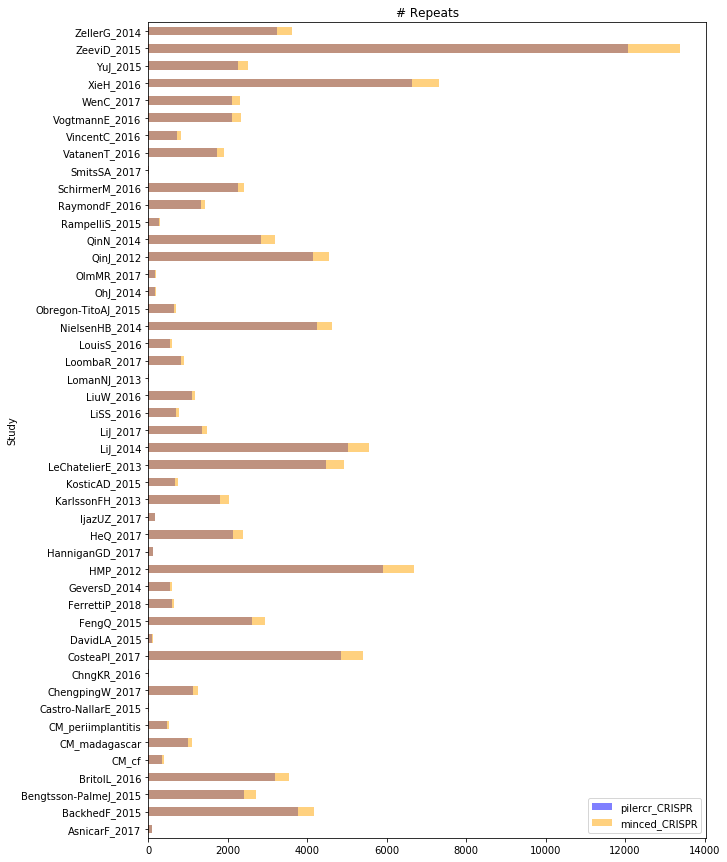

In [9]:


groupedbyds.apply(lambda x : x.pilercr_CRISPR.str.count(">").sum()).plot(kind="barh", title="# Repeats", figsize=(10,15), color="b", alpha=0.5)
groupedbyds.apply(lambda x : x.minced_CRISPR.str.count(">").sum()).plot(kind="barh", color="orange", alpha=0.5)
plt.legend(("pilercr_CRISPR", "minced_CRISPR"))

###  Avg # repeats per genome, per dataset

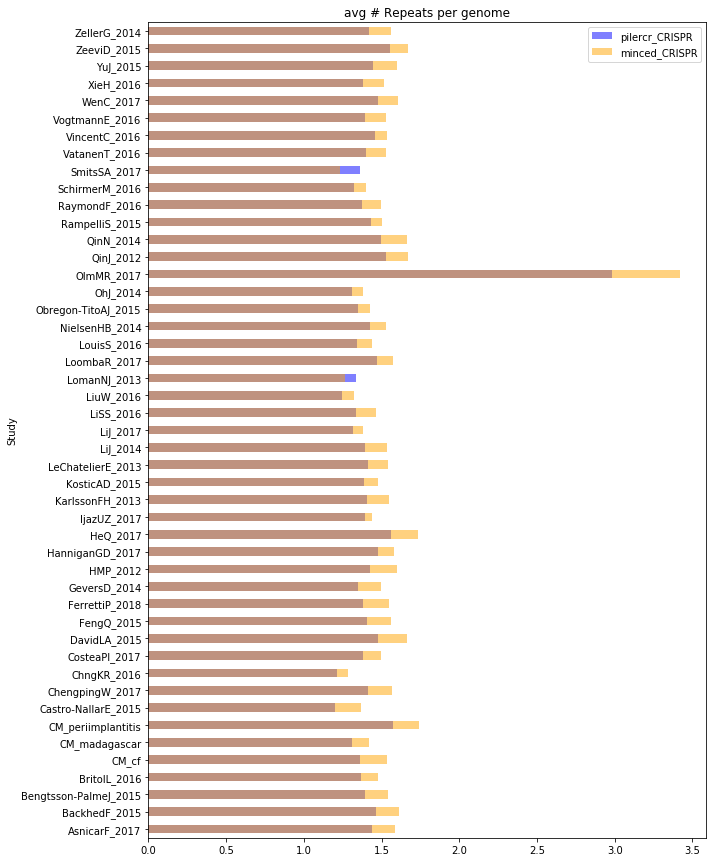

In [10]:

groupedbyds.apply(lambda x : x.pilercr_CRISPR.str.count(">").mean()).plot(kind="barh", title="avg # Repeats per genome", style=".-", figsize=(10,15), color="b", alpha=0.5)
groupedbyds.apply(lambda x : x.minced_CRISPR.str.count(">").mean()).plot(kind="barh",color="orange", alpha=0.5)
plt.legend(("pilercr_CRISPR", "minced_CRISPR"))


### # Cas per dataset


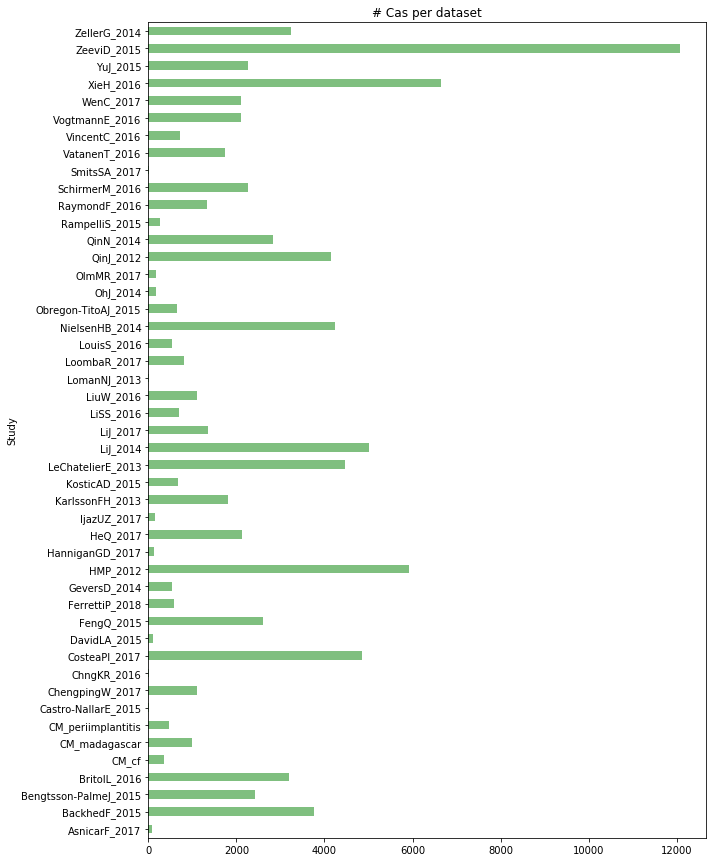

In [11]:
groupedbyds.apply(lambda x : x.pilercr_CRISPR.str.count(">").sum()).plot(kind="barh", title="# Cas per dataset",figsize=(10,15), color="green", alpha=0.5)


###  avg # cas per genome per dataset

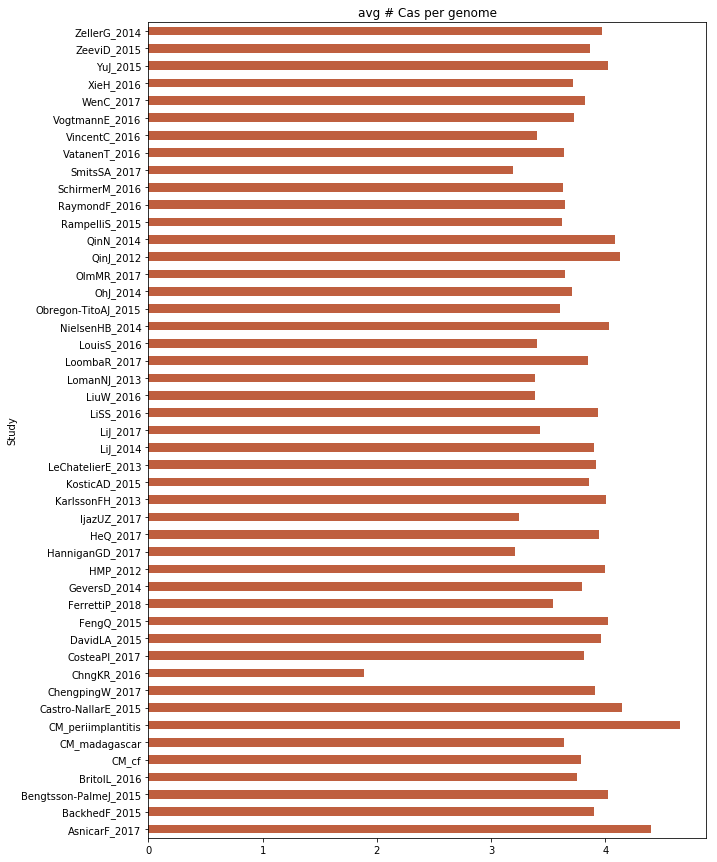

In [7]:
groupedbyds.apply(lambda x : x.prokka_cas.str.count(">").mean()).plot(kind="barh", title="avg # Cas per genome",figsize=(10,15), color="green", alpha=0.5)
groupedbyds.apply(lambda x : x.uniref_cas.str.count(">").mean()).plot(kind="barh", title="avg # Cas per genome",figsize=(10,15), color="red", alpha=0.5)



## 1.3 Data exploration per SGBs
SGBs (Species-level Genome Bins) are the metagenomic equivalent of a bacterial _species_ . There are 4,930 species-level genome bins in this dataset.

### Avg #CRISPR per SGB

In [9]:
groupedbySGB=DF.groupby("SGB ID")


pilercr_avg_count_by_SGB=groupedbySGB.apply(lambda x : x.pilercr_CRISPR.str.count(">").mean()).sort_values()
minced_avg_count_by_SGB=groupedbySGB.apply(lambda x : x.minced_CRISPR.str.count(">").mean()).sort_values()

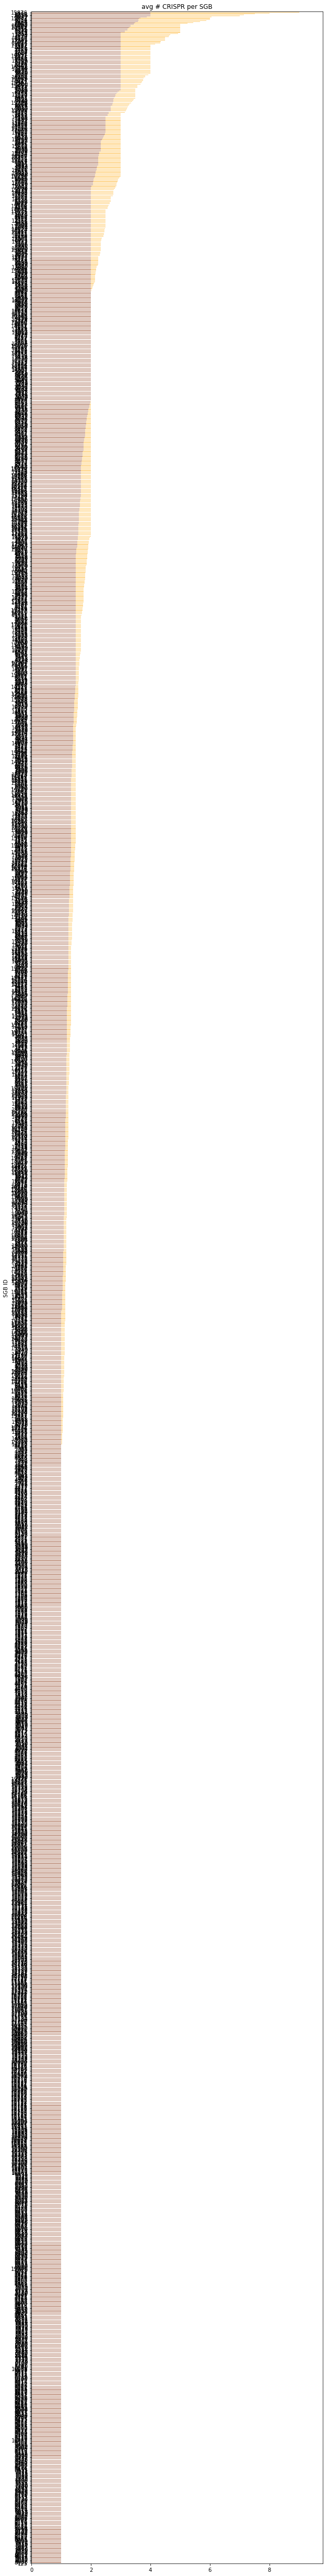

In [16]:

pilercr_avg_count_by_SGB.dropna().plot(kind="barh", title="avg # CRISPR per SGB",figsize=(10,90), color="b", alpha=0.5)

minced_avg_count_by_SGB.dropna().plot(kind="barh", color="orange", alpha=0.5)



In [190]:
# I wonder, what's that blue line there? It must be an SGB where only pilercr has found repeats
#print(minced_avg_count_by_SGB.index)
#for i in minced_avg_count_by_SGB.index:
 #   diff=abs(minced_avg_count_by_SGB[i] - pilercr_avg_count_by_SGB[i])
  #  if diff > 1:
   #     print(i, " : diff", diff)

In [191]:
#print(minced_avg_count_by_SGB[957],pilercr_avg_count_by_SGB[957])

### Avg #Cas per SGB

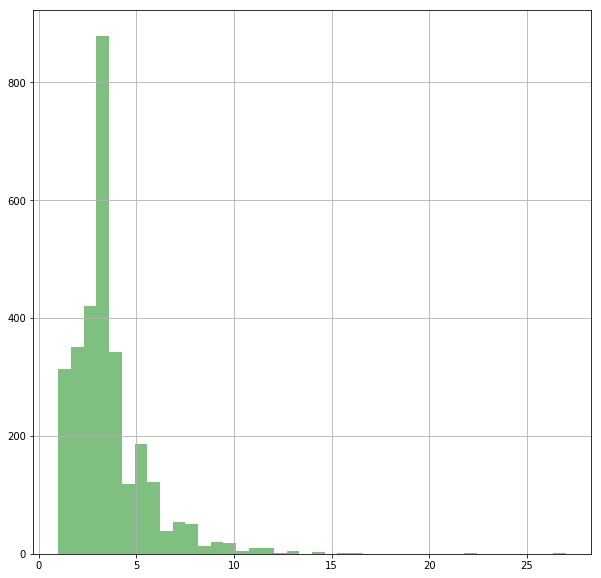

In [11]:
cas_avg_count_by_sgb=groupedbySGB.apply(lambda x : x.prokka_cas.str.count(">").mean()).sort_values()
cas_avg_count_by_sgb.dropna().hist( figsize=(10,10), color="green", alpha=0.5, bins=40)

In [75]:
print(cas_avg_count_by_sgb[cas_avg_count_by_sgb>4])

SGB ID
1928      4.031250
2037      4.040000
8010      4.080000
6007      4.083333
9293      4.083333
4648      4.086957
9303      4.090909
9281      4.092308
6067      4.095238
8005      4.100000
5266      4.125000
6705      4.125000
5099      4.130435
714       4.133929
16987     4.136364
5051      4.137931
7962      4.140845
15177     4.142857
6271      4.142857
6293      4.142857
5742      4.142857
5090      4.150943
1860      4.152542
5904      4.160000
5869      4.166667
5061      4.176471
6571      4.191781
5843      4.200000
9225      4.200000
6934      4.200000
           ...    
15341    11.000000
6733     11.000000
6641     11.000000
6283     11.000000
5829     11.000000
6931     11.000000
4476     11.285714
6622     11.363636
8041     11.500000
6693     11.500000
5806     12.000000
4490     12.000000
4574     12.000000
15887    12.000000
6782     12.000000
4556     12.000000
6763     12.000000
4492     12.000000
5896     12.333333
5760     13.000000
17098    13.000000
8151 

### 7. total # CRISPR per SGB da finire/da fare

In [60]:
pilercr_count_by_SGB=groupedbySGB.apply(lambda x : x.pilercr_CRISPR.str.count(">").sum()).sort_values()
minced_count_by_SGB=groupedbySGB.apply(lambda x : x.minced_CRISPR.str.count(">").sum()).sort_values()

In [72]:
#just checking. Should return true if everything works. 
len(pilercr_count_by_SGB[pilercr_count_by_SGB!=0])==len(pilercr_avg_count_by_SGB.dropna())

True

## shortest working cas9 from most unknown genome

In [6]:
# Extract sequence information from GENOMES WITH <cas9> annotation.
feature="Cas9"
tabellazza=pd.read_csv(datadir+"/3tabellazza/crisprcas_hits_table.csv", index_col=0)
SGBs=pd.read_excel(datadir+"S4Segata.xlsx")
# OPTIONAL TODO : subsample for a single SGB
#chosen_SGB=15286  # Cibiobacter SGB
#single_SGB=tabellazza[tabellazza["SGB ID"]==chosen_SGB]
#subset_of_genomes=single_SGB 

subset_of_genomes=tabellazza

genomes_with_that_feature=subset_of_genomes[subset_of_genomes.prokka_cas.str.contains(feature)==True]
print("Found ", len(genomes_with_that_feature), " genomes with that feature.")

Found  29980  genomes with that feature.


In [7]:
for index, genome in genomes_with_that_feature.iterrows():
    print("\n-----------------------------------------------------\nGenome Name:\t",genome["Genome Name"],"\n-----------------------------------------------------")
    #print("Cas proteins:")
    featureanno=genome.prokka_cas.lstrip(">").split(">")
    if not type(genome.minced_CRISPR)==float:
        CRISPRanno=genome.minced_CRISPR.lstrip(">").split(">")

    else:
#        print("*******************************************************************")
 #       if not type(genome.pilercr_CRISPR)==float:
  #          CRISPRanno=genome.pilercr_CRISPR.lstrip(">").split(">")
   #     else:
        CRISPRanno=[]
    list_of_annotations=featureanno + CRISPRanno 
    contigs=np.unique([anno.split("\t")[0] for anno in list_of_annotations])    
    anno_on_contig={}
  #  print(contigs)
    for contig in contigs:
        anno_on_contig[contig] = [(x.split("\t")[3], x.split("\t")[4], x[x.index("product")+8:x.index("product")+90]) for x in featureanno if contig == x.split("\t")[0]] 
        anno_on_contig[contig] += [(x.split("\t")[3],x.split("\t")[4],x.split("\t")[8][x.split("\t")[8].index("ID")+3:x.split("\t")[8].index("ID")+10]) for x in CRISPRanno if contig == x.split("\t")[0]]  
    for contig in anno_on_contig.keys():
        print("\t---------------------------------------------\n\tContig:\t",
              contig,"\n\t---------------------------------------------")
        length=int(contig.split("_")[3])
        for anno in anno_on_contig[contig]:
            print("\t",anno[2], "start:", int(anno[0]), "stop:", int(anno[1]))


-----------------------------------------------------
Genome Name:	 AsnicarF_2017__MV_FEI4_t1Q14__bin.1 
-----------------------------------------------------
	---------------------------------------------
	Contig:	 NODE_1073_length_1994_cov_2.17225 
	---------------------------------------------
	 CRISPR-associated endonuclease Cas9/Csn1;protein_id=gnl|X|EIBEGOMO_01279 start: 141 stop: 608

-----------------------------------------------------
Genome Name:	 AsnicarF_2017__MV_FEI4_t1Q14__bin.4 
-----------------------------------------------------
	---------------------------------------------
	Contig:	 NODE_45_length_75974_cov_38.2495 
	---------------------------------------------
	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|KBEGFPIJ_01435 start: 32341 stop: 36870
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|KBEGFPIJ_01437 start: 37910 stop: 38842
	 CRISPR-associated endoribonuclease Cas2;protein_id=gnl|X|KBEGFPIJ_01438 start: 38842 stop: 39180
	 CRISPR1 start: 3

	---------------------------------------------
	Contig:	 NODE_354_length_47029_cov_10.5574 
	---------------------------------------------
	 CRISPR-associated endoribonuclease Cas2;protein_id=gnl|X|JAKEPGDG_00355 start: 45594 stop: 45950
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|JAKEPGDG_00356 start: 45943 stop: 46854
	 CRISPR1 start: 43969 stop: 44659
	---------------------------------------------
	Contig:	 NODE_580_length_35658_cov_10.1006 
	---------------------------------------------
	 CRISPR-associated endonuclease Cas9 2;protein_id=gnl|X|JAKEPGDG_00670 start: 141 stop: 4367

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID128_12M__bin.11 
-----------------------------------------------------
	---------------------------------------------
	Contig:	 NODE_204_length_86651_cov_6.1127 
	---------------------------------------------
	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|GEFDIMEJ_01075 start: 6334 stop: 10512
	 CRISPR-

	---------------------------------------------
	Contig:	 NODE_223_length_56160_cov_5.93903 
	---------------------------------------------
	 CRISPR1 start: 28714 stop: 29803
	---------------------------------------------
	Contig:	 NODE_508_length_23025_cov_5.83087 
	---------------------------------------------
	 CRISPR-associated endoribonuclease Cas2;protein_id=gnl|X|OAHGODFE_02233 start: 12996 stop: 13316
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|OAHGODFE_02234 start: 13309 stop: 14214
	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|OAHGODFE_02235 start: 14233 stop: 17640

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID172_4M__bin.16 
-----------------------------------------------------
	---------------------------------------------
	Contig:	 NODE_1101_length_7924_cov_4.4242 
	---------------------------------------------
	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|NBDEHGON_02408 start: 777 stop: 4862
	 CRISPR-as

	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|KHBEJBEF_00264 start: 6523 stop: 10797

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID195_M__bin.11 
-----------------------------------------------------
	---------------------------------------------
	Contig:	 NODE_1597_length_13025_cov_4.45143 
	---------------------------------------------
	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|FMCJNDDF_01145 start: 463 stop: 4440
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|FMCJNDDF_01146 start: 4437 stop: 5303
	 CRISPR-associated endoribonuclease Cas2;protein_id=gnl|X|FMCJNDDF_01147 start: 5300 stop: 5620
	 CRISPR1 start: 6355 stop: 7050

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID195_M__bin.36 
-----------------------------------------------------
	---------------------------------------------
	Contig:	 NODE_2596_length_8912_cov_3.25279 
	---------------------------------------------


	 CRISPR1 start: 21800 stop: 22195
	---------------------------------------------
	Contig:	 NODE_385_length_20307_cov_19.1475 
	---------------------------------------------
	 CRISPR2 start: 13045 stop: 13319

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID256_12M__bin.27 
-----------------------------------------------------
	---------------------------------------------
	Contig:	 NODE_1_length_232165_cov_34.1278 
	---------------------------------------------
	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|MPIHEHAO_00095 start: 123457 stop: 127653
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|MPIHEHAO_00096 start: 127682 stop: 128557
	 CRISPR-associated endoribonuclease Cas2;protein_id=gnl|X|MPIHEHAO_00097 start: 128661 stop: 128861
	 CRISPR1 start: 129602 stop: 130561

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID256_B__bin.1 
-----------------------------------------------------
	-------

	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|IAANFBAE_00193 start: 41124 stop: 42056
	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|IAANFBAE_00195 start: 42943 stop: 47472
	 CRISPR1 start: 35111 stop: 40684

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID274_4M__bin.13 
-----------------------------------------------------
	---------------------------------------------
	Contig:	 NODE_20_length_161558_cov_4.84072 
	---------------------------------------------
	 CRISPR1 start: 161273 stop: 161550
	---------------------------------------------
	Contig:	 NODE_705_length_16256_cov_5.06642 
	---------------------------------------------
	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|FOBDJOFB_02520 start: 9848 stop: 14146
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|FOBDJOFB_02521 start: 14376 stop: 15305
	 CRISPR-associated endoribonuclease Cas2;protein_id=gnl|X|FOBDJOFB_02522 start: 15305 stop: 15637

--------------

	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|JMGIKGHK_01854 start: 57352 stop: 58377
	 CRISPR-associated endonuclease Cas2;protein_id=gnl|X|JMGIKGHK_01855 start: 58395 stop: 58685
	 CRISPR2 start: 55998 stop: 56556
	---------------------------------------------
	Contig:	 NODE_197_length_61996_cov_28.497 
	---------------------------------------------
	 CRISPR3 start: 59 stop: 1997
	---------------------------------------------
	Contig:	 NODE_87_length_107574_cov_32.7655 
	---------------------------------------------
	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|JMGIKGHK_01137 start: 95162 stop: 96295

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID326_4M__bin.8 
-----------------------------------------------------
	---------------------------------------------
	Contig:	 NODE_1_length_802703_cov_47.0076 
	---------------------------------------------
	 CRISPR-associated endoribonuclease Cas2;protein_id=gnl|X|KOBGCLII_00365 star

	---------------------------------------------
	Contig:	 NODE_385_length_44159_cov_8.37468 
	---------------------------------------------
	 CRISPR-associated endoribonuclease Cas2;protein_id=gnl|X|EDEOJBAN_01418 start: 33557 stop: 33877
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|EDEOJBAN_01419 start: 33867 stop: 34265
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|EDEOJBAN_01420 start: 34235 stop: 34741
	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|EDEOJBAN_01421 start: 34760 stop: 38875
	 CRISPR1 start: 32009 stop: 32834
	---------------------------------------------
	Contig:	 NODE_422_length_42060_cov_9.45918 
	---------------------------------------------
	 CRISPR-associated endonuclease Cas2;protein_id=gnl|X|EDEOJBAN_01466 start: 5511 stop: 5801
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|EDEOJBAN_01467 start: 5813 stop: 6844
	 CRISPR pre-crRNA endoribonuclease Cas5d;protein_id=gnl|X|EDEOJBAN_01471 start: 10291 stop: 11031
	 CRISPR2 start: 3

	---------------------------------------------
	Contig:	 NODE_40_length_116016_cov_31.6295 
	---------------------------------------------
	 CRISPR-associated endoribonuclease Cas2;protein_id=gnl|X|JAMAAEFE_01101 start: 98054 stop: 98416
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|JAMAAEFE_01102 start: 98426 stop: 99346
	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|JAMAAEFE_01103 start: 99343 stop: 103842
	 CRISPR1 start: 96410 stop: 97606
	---------------------------------------------
	Contig:	 NODE_95_length_67530_cov_30.5393 
	---------------------------------------------
	 CRISPR-associated endoribonuclease Cas2;protein_id=gnl|X|JAMAAEFE_01669 start: 50132 stop: 50608
	 CRISPR-associated endonuclease Cas1 1;protein_id=gnl|X|JAMAAEFE_01671 start: 51738 stop: 52721
	 CRISPR type III-associated RAMP protein Csm4;protein_id=gnl|X|JAMAAEFE_01678 start: 58277 stop: 59203
	 CRISPR type III-associated RAMP protein Csm3;protein_id=gnl|X|JAMAAEFE_01679 start: 59203 stop: 

	---------------------------------------------
	Contig:	 NODE_1362_length_24283_cov_4.47895 
	---------------------------------------------
	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|KDEKFFCL_00705 start: 3324 stop: 4166
	 CRISPR-associated endonuclease Cas9 2;protein_id=gnl|X|KDEKFFCL_00706 start: 4213 stop: 7539
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|KDEKFFCL_00707 start: 7526 stop: 8407
	 CRISPR-associated endoribonuclease Cas2;protein_id=gnl|X|KDEKFFCL_00708 start: 8431 stop: 8739
	 CRISPR-associated protein Csn2;protein_id=gnl|X|KDEKFFCL_00709 start: 8736 stop: 9416
	 CRISPR1 start: 9472 stop: 10164

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID503_M__bin.48 
-----------------------------------------------------
	---------------------------------------------
	Contig:	 NODE_3543_length_10881_cov_5.63652 
	---------------------------------------------
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|EMIDFGMP_

	---------------------------------------------
	Contig:	 NODE_1360_length_15337_cov_3.7109 
	---------------------------------------------
	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|LHLKKDPL_01526 start: 10599 stop: 14021
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|LHLKKDPL_01527 start: 14040 stop: 14945
	 CRISPR-associated endoribonuclease Cas2;protein_id=gnl|X|LHLKKDPL_01528 start: 14938 stop: 15258
	---------------------------------------------
	Contig:	 NODE_4243_length_4219_cov_2.53506 
	---------------------------------------------
	 CRISPR pre-crRNA endoribonuclease Cas5d;protein_id=gnl|X|LHLKKDPL_03020 start: 2737 stop: 3399
	---------------------------------------------
	Contig:	 NODE_860_length_22441_cov_4.32284 
	---------------------------------------------
	 CRISPR1 start: 109 stop: 1987

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID536_12M__bin.20 
-----------------------------------------------------
	------

	---------------------------------------------
	Contig:	 NODE_21_length_175914_cov_8.23825 
	---------------------------------------------
	 CRISPR-associated endoribonuclease Cas2;protein_id=gnl|X|HMKGHHCD_00889 start: 64577 stop: 64909
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|HMKGHHCD_00890 start: 64911 stop: 65840
	 CRISPR-associated endonuclease Cas9;protein_id=gnl|X|HMKGHHCD_00891 start: 65955 stop: 70229
	 CRISPR1 start: 63809 stop: 64469

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID582_M__bin.10 
-----------------------------------------------------
	---------------------------------------------
	Contig:	 NODE_29_length_159341_cov_5.8663 
	---------------------------------------------
	 CRISPR pre-crRNA endoribonuclease Cas5d;protein_id=gnl|X|DJNPCCHB_00678 start: 52516 stop: 53196
	 CRISPR-associated endonuclease Cas1;protein_id=gnl|X|DJNPCCHB_00682 start: 56463 stop: 57485
	 CRISPR-associated endoribonuclease Cas2;protein

KeyboardInterrupt: 

## sort sequences by length

In [ ]:
cas9s={}
for index, genome in genomes_with_that_feature.iterrows():
    dataset=genome.Study
    genomename=genome["Genome Name"] #TODO Be careful for filename discrepancies, especially with ZeeviD files and with _megahit_ underscores!
    print("\n-----------------------------------------------------\nGenome Name:\t",genome["Genome Name"],"\n-----------------------------------------------------\n")

    
    ######################################################################
    # take into account filename discrepancies
    if dataset.startswith("ZeeviD"):
                   
             working_genomename=filename_discrepancies.change_to_megahit(genomename)
             try:
                 working_genomename=genomename.replace("ZeeviD_2015", "ZeeviD_2015_B")
                 prokkafile_ofsample=open(annodir+"/justminced/ZeeviD_2015_B/"+genomename+".crisprcas.gff.minced")
                 prokkafile_ofsample.close()
                 working_dataset="ZeeviD_2015_B"
             except:
                 working_genomename=genomename.replace("ZeeviD_2015_B", "ZeeviD_2015_A")
                 working_dataset="ZeeviD_2015_A"
    else:
        working_dataset=filename_discrepancies.s3(dataset,r=True)
        working_genomename=genomename.replace(dataset,working_dataset)
        
    print(working_dataset, working_genomename)    
    if filename_discrepancies.dataset_has_megahit(working_dataset,working_genomename):
        working_genomename=filename_discrepancies.change_to_megahit(working_genomename)
        #if dataset.startswith("Beng"):
        print("uuuee", working_genomename)
    ########################################################################

    path="/shares/CIBIO-Storage/CM/scratch/tmp_projects/epasolli_darkmatter/allcontigs/"+working_dataset+"/metabat/genomes_comp50_cont05/prokka/"+working_genomename    
    filename=path+"/"+working_genomename+".faa"
    

     
    for record in SeqIO.parse(filename, "fasta"):
        if "Cas9" in record.description:
            cas9s[(genomename, record.id)]=(record.seq, len(record.seq))
           # genomes_with_that_feature.loc[index]["Cas9 Sequence len"]=len(str(record.seq))
          #  genomes_with_that_feature.loc[index]["Cas9 Sequence"]=str(record.seq)
           # print(len(record.seq),"\n", record.id)
#print(genomes_with_that_feature.['Cas9 Sequence'])


-----------------------------------------------------
Genome Name:	 AsnicarF_2017__MV_FEI4_t1Q14__bin.1 
-----------------------------------------------------

AsnicarF_2017 AsnicarF_2017__MV_FEI4_t1Q14__bin.1

-----------------------------------------------------
Genome Name:	 AsnicarF_2017__MV_FEI4_t1Q14__bin.4 
-----------------------------------------------------

AsnicarF_2017 AsnicarF_2017__MV_FEI4_t1Q14__bin.4

-----------------------------------------------------
Genome Name:	 AsnicarF_2017__MV_FEI4_t2Q15__bin.2 
-----------------------------------------------------

AsnicarF_2017 AsnicarF_2017__MV_FEI4_t2Q15__bin.2

-----------------------------------------------------
Genome Name:	 AsnicarF_2017__MV_FEI4_t2Q15__bin.5 
-----------------------------------------------------

AsnicarF_2017 AsnicarF_2017__MV_FEI4_t2Q15__bin.5

-----------------------------------------------------
Genome Name:	 AsnicarF_2017__MV_FEI5_t1Q14__bin.12 
-------------------------------------------------


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID10_12M__bin.26 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID10_12M__bin.26

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID10_12M__bin.34 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID10_12M__bin.34

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID10_12M__bin.37 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID10_12M__bin.37

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID10_12M__bin.4 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID10_12M__bin.4

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID10_12M__bin.9 
-----------------------------------------------------

BackhedF_2015 BackhedF_20


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID128_4M__bin.12 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID128_4M__bin.12

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID128_4M__bin.15 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID128_4M__bin.15

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID128_4M__bin.16 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID128_4M__bin.16

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID128_4M__bin.19 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID128_4M__bin.19

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID128_B__bin.9 
-----------------------------------------------------

BackhedF_2015 BackhedF_2


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID150_M__bin.28 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID150_M__bin.28

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID150_M__bin.37 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID150_M__bin.37

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID150_M__bin.46 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID150_M__bin.46

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID150_M__bin.8 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID150_M__bin.8

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID157_12M__bin.1 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID18_4M__bin.5 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID18_4M__bin.5

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID18_B__bin.3 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID18_B__bin.3

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID18_B__bin.6 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID18_B__bin.6

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID18_M__bin.1 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID18_M__bin.1

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID18_M__bin.17 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID18_M__bin.17




-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID195_4M__bin.11 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID195_4M__bin.11

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID195_4M__bin.12 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID195_4M__bin.12

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID195_4M__bin.14 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID195_4M__bin.14

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID195_B__bin.5 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID195_B__bin.5

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID195_M__bin.11 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID229_M__bin.27 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID229_M__bin.27

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID229_M__bin.31 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID229_M__bin.31

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID229_M__bin.51 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID229_M__bin.51

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID229_M__bin.58 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID229_M__bin.58

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID229_M__bin.60 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SI


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID244_B__bin.6 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID244_B__bin.6

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID244_M__bin.20 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID244_M__bin.20

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID256_12M__bin.12 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID256_12M__bin.12

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID256_12M__bin.27 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID256_12M__bin.27

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID256_B__bin.1 
-----------------------------------------------------

BackhedF_2015 BackhedF_201


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID265_12M__bin.22 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID265_12M__bin.22

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID265_4M__bin.7 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID265_4M__bin.7

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID265_B__bin.12 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID265_B__bin.12

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID265_B__bin.13 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID265_B__bin.13

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID265_M__bin.10 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID274_M__bin.56 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID274_M__bin.56

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID274_M__bin.65 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID274_M__bin.65

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID275_12M__bin.25 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID275_12M__bin.25

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID275_12M__bin.27 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID275_12M__bin.27

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID275_12M__bin.6 
-----------------------------------------------------

BackhedF_2015 BackhedF


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID282_12M__bin.22 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID282_12M__bin.22

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID282_4M__bin.1 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID282_4M__bin.1

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID282_4M__bin.3 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID282_4M__bin.3

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID282_B__bin.5 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID282_B__bin.5

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID282_B__bin.7 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__S


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID335_4M__bin.15 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID335_4M__bin.15

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID335_4M__bin.16 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID335_4M__bin.16

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID335_B__bin.1 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID335_B__bin.1

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID335_B__bin.10 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID335_B__bin.10

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID335_B__bin.7 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__S


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID350_12M__bin.13 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID350_12M__bin.13

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID350_12M__bin.14 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID350_12M__bin.14

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID350_12M__bin.20 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID350_12M__bin.20

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID350_12M__bin.29 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID350_12M__bin.29

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID350_12M__bin.3 
-----------------------------------------------------

BackhedF_2015 


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID38_12M__bin.21 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID38_12M__bin.21

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID38_12M__bin.22 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID38_12M__bin.22

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID38_4M__bin.12 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID38_4M__bin.12

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID38_4M__bin.9 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID38_4M__bin.9

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID38_M__bin.10 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__S


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID39_12M__bin.32 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID39_12M__bin.32

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID39_12M__bin.39 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID39_12M__bin.39

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID39_12M__bin.45 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID39_12M__bin.45

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID39_12M__bin.50 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID39_12M__bin.50

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID39_12M__bin.52 
-----------------------------------------------------

BackhedF_2015 BackhedF


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID42_M__bin.6 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID42_M__bin.6

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID45_12M__bin.13 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID45_12M__bin.13

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID45_M__bin.4 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID45_M__bin.4

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID45_M__bin.50 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID45_M__bin.50

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID503_4M__bin.14 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID503_4M


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID511_12M__bin.23 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID511_12M__bin.23

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID511_12M__bin.24 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID511_12M__bin.24

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID511_12M__bin.3 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID511_12M__bin.3

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID511_4M__bin.14 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID511_4M__bin.14

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID511_4M__bin.5 
-----------------------------------------------------

BackhedF_2015 Backh


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID536_M__bin.22 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID536_M__bin.22

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID536_M__bin.51 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID536_M__bin.51

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID544_12M__bin.11 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID544_12M__bin.11

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID544_12M__bin.20 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID544_12M__bin.20

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID544_M__bin.16 
-----------------------------------------------------

BackhedF_2015 BackhedF_


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID565_M__bin.39 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID565_M__bin.39

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID566_12M__bin.14 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID566_12M__bin.14

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID566_12M__bin.23 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID566_12M__bin.23

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID566_12M__bin.34 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID566_12M__bin.34

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID566_12M__bin.37 
-----------------------------------------------------

BackhedF_2015 Bac


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID577_B__bin.1 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID577_B__bin.1

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID577_M__bin.10 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID577_M__bin.10

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID577_M__bin.23 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID577_M__bin.23

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID577_M__bin.5 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID577_M__bin.5

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID582_12M__bin.10 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID5


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID590_M__bin.33 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID590_M__bin.33

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID591_12M__bin.16 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID591_12M__bin.16

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID591_12M__bin.9 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID591_12M__bin.9

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID591_4M__bin.1 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID591_4M__bin.1

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID591_4M__bin.10 
-----------------------------------------------------

BackhedF_2015 BackhedF_2


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID608_M__bin.4 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID608_M__bin.4

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID615_12M__bin.21 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID615_12M__bin.21

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID615_12M__bin.3 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID615_12M__bin.3

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID615_12M__bin.39 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID615_12M__bin.39

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID615_12M__bin.40 
-----------------------------------------------------

BackhedF_2015 Backhed


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID633_4M__bin.11 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID633_4M__bin.11

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID633_4M__bin.3 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID633_4M__bin.3

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID633_4M__bin.6 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID633_4M__bin.6

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID633_4M__bin.9 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID633_4M__bin.9

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID633_B__bin.24 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID7_12M__bin.5 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID7_12M__bin.5

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID7_4M__bin.8 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID7_4M__bin.8

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID7_M__bin.16 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID7_M__bin.16

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID7_M__bin.28 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID7_M__bin.28

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID7_M__bin.3 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID7_M__bin.3

----


-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID82_M__bin.45 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID82_M__bin.45

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID82_M__bin.57 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID82_M__bin.57

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID82_M__bin.62 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID82_M__bin.62

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID82_M__bin.63 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID82_M__bin.63

-----------------------------------------------------
Genome Name:	 BackhedF_2015__SID87_12M__bin.27 
-----------------------------------------------------

BackhedF_2015 BackhedF_2015__SID87_12M


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES10__bin.64 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES10__bin.64

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES10__bin.65 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES10__bin.65

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES10__bin.7 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES10__bin.7

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES10__bin.74 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES10__bin.74

-----------------------------------------------------
Genome Name:	 Bengtsson


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES14__bin.96 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES14__bin.96

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES15__bin.36 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES15__bin.36

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES15__bin.37 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES15__bin.37

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES15__bin.42 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES15__bin.42

-----------------------------------------------------
Genome Name:	 Bengtss


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES18__bin.7 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES18__bin.7

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES18__bin.75 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES18__bin.75

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES18__bin.83 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES18__bin.83

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES18__bin.96 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES18__bin.96

-----------------------------------------------------
Genome Name:	 Bengtsson


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES22__bin.110 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES22__bin.110

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES22__bin.111 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES22__bin.111

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES22__bin.125 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES22__bin.125

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES22__bin.127 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES22__bin.127

-----------------------------------------------------
Genome Name:	


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES26__bin.131 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES26__bin.131
uuuee BengtssonPalmeJ_2015__TRAVELRES26_megahit__bin.131

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES26__bin.135 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES26__bin.135
uuuee BengtssonPalmeJ_2015__TRAVELRES26_megahit__bin.135

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES26__bin.156 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES26__bin.156
uuuee BengtssonPalmeJ_2015__TRAVELRES26_megahit__bin.156

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES26__bin.169 
----------------


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES28__bin.54 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES28__bin.54

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES28__bin.57 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES28__bin.57

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES28__bin.62 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES28__bin.62

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES28__bin.7 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES28__bin.7

-----------------------------------------------------
Genome Name:	 Bengtsson


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES30__bin.56 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES30__bin.56

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES30__bin.61 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES30__bin.61

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES30__bin.63 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES30__bin.63

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES30__bin.75 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES30__bin.75

-----------------------------------------------------
Genome Name:	 Bengtss


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES33__bin.21 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES33__bin.21

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES33__bin.22 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES33__bin.22

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES33__bin.40 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES33__bin.40

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES33__bin.48 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES33__bin.48

-----------------------------------------------------
Genome Name:	 Bengtss


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES36__bin.29 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES36__bin.29

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES36__bin.35 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES36__bin.35

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES36__bin.37 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES36__bin.37

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES36__bin.38 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES36__bin.38

-----------------------------------------------------
Genome Name:	 Bengtss


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES39__bin.65 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES39__bin.65

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES39__bin.87 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES39__bin.87

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES4__bin.101 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES4__bin.101

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES4__bin.102 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES4__bin.102

-----------------------------------------------------
Genome Name:	 Bengtss


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES41__bin.28 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES41__bin.28

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES41__bin.29 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES41__bin.29

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES41__bin.35 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES41__bin.35

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES41__bin.37 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES41__bin.37

-----------------------------------------------------
Genome Name:	 Bengtss


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES45__bin.115 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES45__bin.115

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES45__bin.133 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES45__bin.133

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES45__bin.134 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES45__bin.134

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES45__bin.23 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES45__bin.23

-----------------------------------------------------
Genome Name:	 B


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES46__bin.68 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES46__bin.68

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES46__bin.7 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES46__bin.7

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES46__bin.73 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES46__bin.73

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES46__bin.9 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES46__bin.9

-----------------------------------------------------
Genome Name:	 Bengtsson-P


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES49__bin.45 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES49__bin.45

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES49__bin.48 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES49__bin.48

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES49__bin.52 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES49__bin.52

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES49__bin.59 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES49__bin.59

-----------------------------------------------------
Genome Name:	 Bengtss


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES51__bin.74 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES51__bin.74

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES51__bin.88 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES51__bin.88

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES52__bin.16 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES52__bin.16

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES52__bin.21 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES52__bin.21

-----------------------------------------------------
Genome Name:	 Bengtss


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES55__bin.79 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES55__bin.79

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES56__bin.14 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES56__bin.14

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES56__bin.15 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES56__bin.15

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES56__bin.28 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES56__bin.28

-----------------------------------------------------
Genome Name:	 Bengtss


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES58__bin.83 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES58__bin.83

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES58__bin.9 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES58__bin.9

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES58__bin.94 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES58__bin.94

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES59__bin.12 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES59__bin.12

-----------------------------------------------------
Genome Name:	 Bengtsson


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES60__bin.14 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES60__bin.14

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES60__bin.15 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES60__bin.15

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES60__bin.19 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES60__bin.19

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES60__bin.31 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES60__bin.31

-----------------------------------------------------
Genome Name:	 Bengtss


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES62__bin.52 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES62__bin.52

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES62__bin.57 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES62__bin.57

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES62__bin.78 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES62__bin.78

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES62__bin.79 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES62__bin.79

-----------------------------------------------------
Genome Name:	 Bengtss


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES66__bin.58 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES66__bin.58

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES66__bin.71 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES66__bin.71

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES66__bin.74 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES66__bin.74

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES66__bin.78 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES66__bin.78

-----------------------------------------------------
Genome Name:	 Bengtss


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES7__bin.110 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES7__bin.110

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES7__bin.115 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES7__bin.115

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES7__bin.122 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES7__bin.122

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES7__bin.14 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES7__bin.14

-----------------------------------------------------
Genome Name:	 Bengtsson


-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES9__bin.161 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES9__bin.161

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES9__bin.162 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES9__bin.162

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES9__bin.163 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES9__bin.163

-----------------------------------------------------
Genome Name:	 Bengtsson-PalmeJ_2015__TRAVELRES9__bin.20 
-----------------------------------------------------

BengtssonPalmeJ_2015 BengtssonPalmeJ_2015__TRAVELRES9__bin.20

-----------------------------------------------------
Genome Name:	 Bengtsson


-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.15.ST__bin.13 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.15.ST__bin.13

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.15.ST__bin.20 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.15.ST__bin.20

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.15.ST__bin.26 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.15.ST__bin.26

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.15.ST__bin.27 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.15.ST__bin.27

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.15.ST__bin.30 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.15.ST__bin.30



-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.20.ST__bin.46 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.20.ST__bin.46

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.20.ST__bin.5 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.20.ST__bin.5

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.20.ST__bin.53 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.20.ST__bin.53

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.20.ST__bin.54 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.20.ST__bin.54

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.20.ST__bin.55 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.20.ST__bin.55

-


-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.26.ST__bin.69 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.26.ST__bin.69

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.26.ST__bin.72 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.26.ST__bin.72

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.27.ST__bin.117 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.27.ST__bin.117

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.27.ST__bin.23 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.27.ST__bin.23

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.27.ST__bin.24 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.27.ST__bin.2


-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.37.ST__bin.69 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.37.ST__bin.69

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.37.ST__bin.74 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.37.ST__bin.74

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.38.SA__bin.2 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.38.SA__bin.2

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.38.ST__bin.11 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.38.ST__bin.11

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.38.ST__bin.12 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.38.ST__bin.12

-


-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.48.ST__bin.19 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.48.ST__bin.19

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.48.ST__bin.26 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.48.ST__bin.26

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.48.ST__bin.29 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.48.ST__bin.29

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.48.ST__bin.32 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.48.ST__bin.32

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.48.ST__bin.36 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.48.ST__bin.36



-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.6.ST__bin.12 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.6.ST__bin.12

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.6.ST__bin.24 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.6.ST__bin.24

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.6.ST__bin.28 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.6.ST__bin.28

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.6.ST__bin.36 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.6.ST__bin.36

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.61.ST__bin.13 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.61.ST__bin.13

-------


-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.7.ST__bin.69 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.7.ST__bin.69

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.8.ST__bin.1 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.8.ST__bin.1

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.8.ST__bin.21 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.8.ST__bin.21

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.8.ST__bin.35 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.8.ST__bin.35

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M1.8.ST__bin.7 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M1.8.ST__bin.7

-------------


-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.37.ST__bin.53 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.37.ST__bin.53

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.37.ST__bin.70 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.37.ST__bin.70

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.37.ST__bin.87 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.37.ST__bin.87

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.37.ST__bin.9 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.37.ST__bin.9

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.38.ST__bin.18 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.38.ST__bin.18

-


-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.44.ST__bin.15 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.44.ST__bin.15

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.44.ST__bin.36 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.44.ST__bin.36

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.44.ST__bin.48 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.44.ST__bin.48

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.44.ST__bin.6 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.44.ST__bin.6

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.44.ST__bin.67 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.44.ST__bin.67

-


-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.49.ST__bin.62 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.49.ST__bin.62

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.49.ST__bin.8 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.49.ST__bin.8

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.49.ST__bin.80 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.49.ST__bin.80

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.49.ST__bin.83 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.49.ST__bin.83

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.49.ST__bin.9 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.49.ST__bin.9

---


-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.60.ST__bin.13 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.60.ST__bin.13

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.60.ST__bin.15 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.60.ST__bin.15

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.60.ST__bin.45 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.60.ST__bin.45

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.60.ST__bin.56 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.60.ST__bin.56

-----------------------------------------------------
Genome Name:	 BritoIL_2016__M2.60.ST__bin.65 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__M2.60.ST__bin.65



-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.18.ST__bin.6 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.18.ST__bin.6

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.18.ST__bin.72 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.18.ST__bin.72

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.18.ST__bin.79 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.18.ST__bin.79

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.2.ST__bin.12 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.2.ST__bin.12

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.2.ST__bin.21 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.2.ST__bin.21

-----


-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.27.ST__bin.29 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.27.ST__bin.29

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.27.ST__bin.32 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.27.ST__bin.32

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.27.ST__bin.44 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.27.ST__bin.44

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.27.ST__bin.51 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.27.ST__bin.51

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.27.ST__bin.60 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.27.ST__bin.60



-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.38.ST__bin.17 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.38.ST__bin.17

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.38.ST__bin.4 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.38.ST__bin.4

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.39.ST__bin.1 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.39.ST__bin.1

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.39.ST__bin.104 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.39.ST__bin.104

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.39.ST__bin.16 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.39.ST__bin.16

-


-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.44.ST__bin.28 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.44.ST__bin.28

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.44.ST__bin.43 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.44.ST__bin.43

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.44.ST__bin.61 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.44.ST__bin.61

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.44.ST__bin.64 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.44.ST__bin.64

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.5.SA__bin.1 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.5.SA__bin.1

---


-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.6.ST__bin.68 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.6.ST__bin.68

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.6.ST__bin.8 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.6.ST__bin.8

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.8.ST__bin.2 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.8.ST__bin.2

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.8.ST__bin.28 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.8.ST__bin.28

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W1.8.ST__bin.57 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W1.8.ST__bin.57

-------------


-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.19.ST__bin.23 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.19.ST__bin.23

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.19.ST__bin.33 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.19.ST__bin.33

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.19.ST__bin.40 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.19.ST__bin.40

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.19.ST__bin.51 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.19.ST__bin.51

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.19.ST__bin.61 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.19.ST__bin.61



-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.35.ST__bin.40 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.35.ST__bin.40

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.35.ST__bin.55 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.35.ST__bin.55

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.35.ST__bin.60 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.35.ST__bin.60

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.35.ST__bin.69 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.35.ST__bin.69

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.35.ST__bin.74 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.35.ST__bin.74



-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.41.ST__bin.61 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.41.ST__bin.61

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.41.ST__bin.95 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.41.ST__bin.95

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.43.ST__bin.29 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.43.ST__bin.29

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.43.ST__bin.4 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.43.ST__bin.4

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.43.ST__bin.50 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.43.ST__bin.50

-


-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.5.ST__bin.32 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.5.ST__bin.32

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.5.ST__bin.34 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.5.ST__bin.34

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.5.ST__bin.44 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.5.ST__bin.44

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.5.ST__bin.48 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.5.ST__bin.48

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.5.ST__bin.51 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.5.ST__bin.51

---------


-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.6.ST__bin.29 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.6.ST__bin.29

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.6.ST__bin.44 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.6.ST__bin.44

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.6.ST__bin.47 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.6.ST__bin.47

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.6.ST__bin.48 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.6.ST__bin.48

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.6.ST__bin.58 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.6.ST__bin.58

---------


-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.67.ST__bin.44 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.67.ST__bin.44

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.67.ST__bin.51 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.67.ST__bin.51

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.67.ST__bin.61 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.67.ST__bin.61

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.67.ST__bin.69 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.67.ST__bin.69

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.68.SA__bin.21 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.68.SA__bin.21



-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.9.ST__bin.86 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.9.ST__bin.86

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W2.9.ST__bin.91 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W2.9.ST__bin.91

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W3.1.ST__bin.46 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W3.1.ST__bin.46

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W3.1.ST__bin.50 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W3.1.ST__bin.50

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W3.1.ST__bin.7 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W3.1.ST__bin.7

-----------


-----------------------------------------------------
Genome Name:	 BritoIL_2016__W3.20.ST__bin.54 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W3.20.ST__bin.54

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W3.21.ST__bin.36 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W3.21.ST__bin.36

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W3.21.ST__bin.50 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W3.21.ST__bin.50

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W3.22.SA__bin.21 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W3.22.SA__bin.21

-----------------------------------------------------
Genome Name:	 BritoIL_2016__W3.22.SA__bin.26 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__W3.22.SA__bin.26



-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.10.ST__bin.4 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.10.ST__bin.4

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.10.ST__bin.69 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.10.ST__bin.69

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.11.ST__bin.18 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.11.ST__bin.18

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.11.ST__bin.20 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.11.ST__bin.20

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.11.ST__bin.27 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.11.ST__bin.27

-


-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.20.ST__bin.11 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.20.ST__bin.11

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.20.ST__bin.31 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.20.ST__bin.31

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.20.ST__bin.39 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.20.ST__bin.39

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.20.ST__bin.53 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.20.ST__bin.53

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.20.ST__bin.58 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.20.ST__bin.58



-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.32.ST__bin.30 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.32.ST__bin.30

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.32.ST__bin.31 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.32.ST__bin.31

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.32.ST__bin.32 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.32.ST__bin.32

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.32.ST__bin.37 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.32.ST__bin.37

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.32.ST__bin.53 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.32.ST__bin.53



-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.43.ST__bin.16 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.43.ST__bin.16

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.43.ST__bin.22 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.43.ST__bin.22

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.43.ST__bin.38 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.43.ST__bin.38

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.43.ST__bin.41 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.43.ST__bin.41

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.43.ST__bin.42 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.43.ST__bin.42



-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.8.ST__bin.7 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.8.ST__bin.7

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.8.ST__bin.71 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.8.ST__bin.71

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.8.ST__bin.79 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.8.ST__bin.79

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.9.ST__bin.2 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.9.ST__bin.2

-----------------------------------------------------
Genome Name:	 BritoIL_2016__WL.9.ST__bin.31 
-----------------------------------------------------

BritoIL_2016 BritoIL_2016__WL.9.ST__bin.31

-------------


-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC004SS_t1M15__bin.20 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC004SS_t1M15__bin.20

-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC004SS_t1M15__bin.7 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC004SS_t1M15__bin.7

-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC005IS_t1M15__bin.9 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC005IS_t1M15__bin.9

-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC005IS_t3M15__bin.2 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC005IS_t3M15__bin.2

-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC005SA_t1M15__bin.18 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC005SA_t1M15__bin.18

----------


-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC023IS_t3M15__bin.16 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC023IS_t3M15__bin.16

-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC023IS_t3M15__bin.2 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC023IS_t3M15__bin.2

-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC023IS_t3M15__bin.3 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC023IS_t3M15__bin.3

-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC023SA_t1M16__bin.5 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC023SA_t1M16__bin.5

-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC034SA_t1M16__bin.10 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC034SA_t1M16__bin.10

----------


-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC051SA_t1M16__bin.13 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC051SA_t1M16__bin.13

-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC051SA_t1M16__bin.17 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC051SA_t1M16__bin.17

-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC051SA_t1M16__bin.3 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC051SA_t1M16__bin.3

-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC051SA_t1M16__bin.4 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC051SA_t1M16__bin.4

-----------------------------------------------------
Genome Name:	 CM_cf__CF_TNFC054IS_t1M15__bin.21 
-----------------------------------------------------

CM_cf CM_cf__CF_TNFC054IS_t1M15__bin.21

--------


-----------------------------------------------------
Genome Name:	 CM_madagascar__A08_01_1FE__bin.20 
-----------------------------------------------------

CM_madagascar CM_madagascar__A08_01_1FE__bin.20

-----------------------------------------------------
Genome Name:	 CM_madagascar__A08_01_1FE__bin.30 
-----------------------------------------------------

CM_madagascar CM_madagascar__A08_01_1FE__bin.30

-----------------------------------------------------
Genome Name:	 CM_madagascar__A08_01_1FE__bin.36 
-----------------------------------------------------

CM_madagascar CM_madagascar__A08_01_1FE__bin.36

-----------------------------------------------------
Genome Name:	 CM_madagascar__A08_01_1FE__bin.40 
-----------------------------------------------------

CM_madagascar CM_madagascar__A08_01_1FE__bin.40

-----------------------------------------------------
Genome Name:	 CM_madagascar__A09_01_1FE__bin.14 
-----------------------------------------------------

CM_madagascar


-----------------------------------------------------
Genome Name:	 CM_madagascar__A19_01_1FE__bin.16 
-----------------------------------------------------

CM_madagascar CM_madagascar__A19_01_1FE__bin.16

-----------------------------------------------------
Genome Name:	 CM_madagascar__A19_01_1FE__bin.18 
-----------------------------------------------------

CM_madagascar CM_madagascar__A19_01_1FE__bin.18

-----------------------------------------------------
Genome Name:	 CM_madagascar__A19_01_1FE__bin.20 
-----------------------------------------------------

CM_madagascar CM_madagascar__A19_01_1FE__bin.20

-----------------------------------------------------
Genome Name:	 CM_madagascar__A19_01_1FE__bin.27 
-----------------------------------------------------

CM_madagascar CM_madagascar__A19_01_1FE__bin.27

-----------------------------------------------------
Genome Name:	 CM_madagascar__A20_03_1FE__bin.16 
-----------------------------------------------------

CM_madagascar


-----------------------------------------------------
Genome Name:	 CM_madagascar__A34_02_1FE__bin.7 
-----------------------------------------------------

CM_madagascar CM_madagascar__A34_02_1FE__bin.7

-----------------------------------------------------
Genome Name:	 CM_madagascar__A34_02_1FE__bin.9 
-----------------------------------------------------

CM_madagascar CM_madagascar__A34_02_1FE__bin.9

-----------------------------------------------------
Genome Name:	 CM_madagascar__A35_01_1FE__bin.5 
-----------------------------------------------------

CM_madagascar CM_madagascar__A35_01_1FE__bin.5

-----------------------------------------------------
Genome Name:	 CM_madagascar__A36_01_1FE__bin.14 
-----------------------------------------------------

CM_madagascar CM_madagascar__A36_01_1FE__bin.14

-----------------------------------------------------
Genome Name:	 CM_madagascar__A36_01_1FE__bin.16 
-----------------------------------------------------

CM_madagascar CM_ma


-----------------------------------------------------
Genome Name:	 CM_madagascar__A48_05_1FE__bin.16 
-----------------------------------------------------

CM_madagascar CM_madagascar__A48_05_1FE__bin.16

-----------------------------------------------------
Genome Name:	 CM_madagascar__A48_05_1FE__bin.19 
-----------------------------------------------------

CM_madagascar CM_madagascar__A48_05_1FE__bin.19

-----------------------------------------------------
Genome Name:	 CM_madagascar__A48_05_1FE__bin.2 
-----------------------------------------------------

CM_madagascar CM_madagascar__A48_05_1FE__bin.2

-----------------------------------------------------
Genome Name:	 CM_madagascar__A49_01_1FE__bin.22 
-----------------------------------------------------

CM_madagascar CM_madagascar__A49_01_1FE__bin.22

-----------------------------------------------------
Genome Name:	 CM_madagascar__A49_01_1FE__bin.24 
-----------------------------------------------------

CM_madagascar C


-----------------------------------------------------
Genome Name:	 CM_madagascar__A62_01_1FE__bin.12 
-----------------------------------------------------

CM_madagascar CM_madagascar__A62_01_1FE__bin.12

-----------------------------------------------------
Genome Name:	 CM_madagascar__A62_01_1FE__bin.34 
-----------------------------------------------------

CM_madagascar CM_madagascar__A62_01_1FE__bin.34

-----------------------------------------------------
Genome Name:	 CM_madagascar__A62_01_1FE__bin.43 
-----------------------------------------------------

CM_madagascar CM_madagascar__A62_01_1FE__bin.43

-----------------------------------------------------
Genome Name:	 CM_madagascar__A62_01_1FE__bin.51 
-----------------------------------------------------

CM_madagascar CM_madagascar__A62_01_1FE__bin.51

-----------------------------------------------------
Genome Name:	 CM_madagascar__A62_01_1FE__bin.52 
-----------------------------------------------------

CM_madagascar


-----------------------------------------------------
Genome Name:	 CM_madagascar__A73_02_1FE__bin.44 
-----------------------------------------------------

CM_madagascar CM_madagascar__A73_02_1FE__bin.44

-----------------------------------------------------
Genome Name:	 CM_madagascar__A73_02_1FE__bin.6 
-----------------------------------------------------

CM_madagascar CM_madagascar__A73_02_1FE__bin.6

-----------------------------------------------------
Genome Name:	 CM_madagascar__A75_02_1FE__bin.1 
-----------------------------------------------------

CM_madagascar CM_madagascar__A75_02_1FE__bin.1

-----------------------------------------------------
Genome Name:	 CM_madagascar__A75_02_1FE__bin.53 
-----------------------------------------------------

CM_madagascar CM_madagascar__A75_02_1FE__bin.53

-----------------------------------------------------
Genome Name:	 CM_madagascar__A79_02_1FE__bin.12 
-----------------------------------------------------

CM_madagascar CM_


-----------------------------------------------------
Genome Name:	 CM_madagascar__A89_01_1FE__bin.40 
-----------------------------------------------------

CM_madagascar CM_madagascar__A89_01_1FE__bin.40

-----------------------------------------------------
Genome Name:	 CM_madagascar__A89_01_1FE__bin.41 
-----------------------------------------------------

CM_madagascar CM_madagascar__A89_01_1FE__bin.41

-----------------------------------------------------
Genome Name:	 CM_madagascar__A89_01_1FE__bin.71 
-----------------------------------------------------

CM_madagascar CM_madagascar__A89_01_1FE__bin.71

-----------------------------------------------------
Genome Name:	 CM_madagascar__A89_01_1FE__bin.72 
-----------------------------------------------------

CM_madagascar CM_madagascar__A89_01_1FE__bin.72

-----------------------------------------------------
Genome Name:	 CM_madagascar__A89_01_1FE__bin.84 
-----------------------------------------------------

CM_madagascar


-----------------------------------------------------
Genome Name:	 CM_madagascar__A94_02_1FE__bin.44 
-----------------------------------------------------

CM_madagascar CM_madagascar__A94_02_1FE__bin.44

-----------------------------------------------------
Genome Name:	 CM_madagascar__A94_02_1FE__bin.58 
-----------------------------------------------------

CM_madagascar CM_madagascar__A94_02_1FE__bin.58

-----------------------------------------------------
Genome Name:	 CM_madagascar__A94_02_1FE__bin.67 
-----------------------------------------------------

CM_madagascar CM_madagascar__A94_02_1FE__bin.67

-----------------------------------------------------
Genome Name:	 CM_madagascar__A94_03_1FE__bin.1 
-----------------------------------------------------

CM_madagascar CM_madagascar__A94_03_1FE__bin.1

-----------------------------------------------------
Genome Name:	 CM_madagascar__A94_03_1FE__bin.20 
-----------------------------------------------------

CM_madagascar C


-----------------------------------------------------
Genome Name:	 CM_madagascar__V19_01_2FE__bin.16 
-----------------------------------------------------

CM_madagascar CM_madagascar__V19_01_2FE__bin.16

-----------------------------------------------------
Genome Name:	 CM_madagascar__V19_01_2FE__bin.30 
-----------------------------------------------------

CM_madagascar CM_madagascar__V19_01_2FE__bin.30

-----------------------------------------------------
Genome Name:	 CM_madagascar__V19_01_2FE__bin.32 
-----------------------------------------------------

CM_madagascar CM_madagascar__V19_01_2FE__bin.32

-----------------------------------------------------
Genome Name:	 CM_madagascar__V19_01_2FE__bin.35 
-----------------------------------------------------

CM_madagascar CM_madagascar__V19_01_2FE__bin.35

-----------------------------------------------------
Genome Name:	 CM_madagascar__V19_01_2FE__bin.36 
-----------------------------------------------------

CM_madagascar


-----------------------------------------------------
Genome Name:	 CM_madagascar__V54_01_1FE__bin.27 
-----------------------------------------------------

CM_madagascar CM_madagascar__V54_01_1FE__bin.27

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_105SPI_T016__bin.1 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_105SPI_T016__bin.1

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_105SPI_T016__bin.10 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_105SPI_T016__bin.10

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_105SPI_T016__bin.5 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_105SPI_T016__bin.5

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_105SPI_T016__bi


-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_184SPT_T016__bin.11 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_184SPT_T016__bin.11

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_184SPT_T016__bin.12 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_184SPT_T016__bin.12

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_184SPT_T016__bin.13 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_184SPT_T016__bin.13

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_184SPT_T016__bin.15 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_184SPT_T016__bin.15

-----------------------------------------------------
Genome Name:	 CM_periimpl


-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_282SPT_T016_R__bin.37 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_282SPT_T016_R__bin.37

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_282SPT_T016_R__bin.6 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_282SPT_T016_R__bin.6

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_283SPI_T016__bin.11 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_283SPI_T016__bin.11

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_283SPI_T016__bin.17 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_283SPI_T016__bin.17

-----------------------------------------------------
Genome Name:	 CM_pe


-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_323SPI_T016__bin.8 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_323SPI_T016__bin.8

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_323SPI_T016__bin.9 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_323SPI_T016__bin.9

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_326SPI_T016__bin.3 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_326SPI_T016__bin.3

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_344SPT_T016__bin.15 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_344SPT_T016__bin.15

-----------------------------------------------------
Genome Name:	 CM_periimplantiti


-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_403SPT_T016__bin.10 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_403SPT_T016__bin.10

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_403SPT_T016__bin.11 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_403SPT_T016__bin.11

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_403SPT_T016__bin.7 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_403SPT_T016__bin.7

-----------------------------------------------------
Genome Name:	 CM_periimplantitis__SP_403SPT_T016__bin.9 
-----------------------------------------------------

CM_periimplantitis CM_periimplantitis__SP_403SPT_T016__bin.9

-----------------------------------------------------
Genome Name:	 CM_periimplanti


-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS105raw__bin.14 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS105raw__bin.14

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS105raw__bin.16 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS105raw__bin.16

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS105raw__bin.20 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS105raw__bin.20

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS105raw__bin.30 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS105raw__bin.30

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS105raw__bin.37 
-----------------------------------------------------

Cheng


-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS120raw__bin.40 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS120raw__bin.40

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS120raw__bin.44 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS120raw__bin.44

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS121raw__bin.1 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS121raw__bin.1

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS121raw__bin.23 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS121raw__bin.23

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS121raw__bin.28 
-----------------------------------------------------

Chengpi


-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS134raw__bin.33 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS134raw__bin.33

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS134raw__bin.38 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS134raw__bin.38

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS134raw__bin.49 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS134raw__bin.49

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS134raw__bin.7 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS134raw__bin.7

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS136raw__bin.13 
-----------------------------------------------------

Chengpi


-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS21raw__bin.45 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS21raw__bin.45

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS22raw__bin.15 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS22raw__bin.15

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS22raw__bin.24 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS22raw__bin.24

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS22raw__bin.6 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS22raw__bin.6

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS24raw__bin.15 
-----------------------------------------------------

ChengpingW_2017 


-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS38raw__bin.35 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS38raw__bin.35

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS38raw__bin.38 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS38raw__bin.38

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS38raw__bin.50 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS38raw__bin.50

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS3raw__bin.10 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS3raw__bin.10

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS3raw__bin.16 
-----------------------------------------------------

ChengpingW_2017 C


-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS46raw__bin.7 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS46raw__bin.7

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS48raw__bin.19 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS48raw__bin.19

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS48raw__bin.32 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS48raw__bin.32

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS49raw__bin.21 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS49raw__bin.21

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS49raw__bin.30 
-----------------------------------------------------

ChengpingW_2017 


-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS68raw__bin.11 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS68raw__bin.11

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS68raw__bin.20 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS68raw__bin.20

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS68raw__bin.35 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS68raw__bin.35

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS68raw__bin.36 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS68raw__bin.36

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS68raw__bin.37 
-----------------------------------------------------

ChengpingW_201


-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS80raw__bin.2 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS80raw__bin.2

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS80raw__bin.26 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS80raw__bin.26

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS80raw__bin.27 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS80raw__bin.27

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS80raw__bin.3 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS80raw__bin.3

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS80raw__bin.6 
-----------------------------------------------------

ChengpingW_2017 Che


-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS98raw__bin.39 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS98raw__bin.39

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS98raw__bin.42 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS98raw__bin.42

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS98raw__bin.8 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS98raw__bin.8

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS99raw__bin.18 
-----------------------------------------------------

ChengpingW_2017 ChengpingW_2017__AS99raw__bin.18

-----------------------------------------------------
Genome Name:	 ChengpingW_2017__AS99raw__bin.20 
-----------------------------------------------------

ChengpingW_2017 


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__alien-11-632-0__bin.28 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__alien-11-632-0__bin.28

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__alien-11-632-0__bin.36 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__alien-11-632-0__bin.36

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__alien-11-632-0__bin.39 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__alien-11-632-0__bin.39

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__alien-11-632-0__bin.40 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__alien-11-632-0__bin.40

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__alien-11-632-0__bin.41 
--------------------------------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__alien-11-904-0__bin.8 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__alien-11-904-0__bin.8

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__alien-11-904-0__bin.9 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__alien-11-904-0__bin.9

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__alien-11-918-0__bin.21 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__alien-11-918-0__bin.21

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__alien-11-918-0__bin.25 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__alien-11-918-0__bin.25

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__alien-11-918-0__bin.28 
------------------------------------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__bugkiller-11-7-0__bin.29 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__bugkiller-11-7-0__bin.29

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__bugkiller-11-7-0__bin.8 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__bugkiller-11-7-0__bin.8

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__bugkiller-11-773-0__bin.21 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__bugkiller-11-773-0__bin.21

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__bugkiller-11-773-0__bin.3 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__bugkiller-11-773-0__bin.3

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__bugkiller-11-773-0__bin.35 
--------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__daisy-11-389-0__bin.2 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__daisy-11-389-0__bin.2

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__daisy-11-389-0__bin.20 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__daisy-11-389-0__bin.20

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__daisy-11-389-0__bin.25 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__daisy-11-389-0__bin.25

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__daisy-11-389-0__bin.36 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__daisy-11-389-0__bin.36

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__daisy-11-389-0__bin.5 
-----------------------------------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__daisy-11-7-0__bin.14 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__daisy-11-7-0__bin.14

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__daisy-11-7-0__bin.19 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__daisy-11-7-0__bin.19

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__daisy-11-7-0__bin.2 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__daisy-11-7-0__bin.2

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__daisy-11-7-0__bin.27 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__daisy-11-7-0__bin.27

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__daisy-11-7-0__bin.31 
----------------------------------------------------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald2-11-0-0__bin.17 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__donald2-11-0-0__bin.17

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald2-11-0-0__bin.20 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__donald2-11-0-0__bin.20

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald2-11-0-0__bin.31 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__donald2-11-0-0__bin.31

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald2-11-0-0__bin.35 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__donald2-11-0-0__bin.35

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald2-11-0-0__bin.37 
--------------------------------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald3-11-7-0__bin.13 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__donald3-11-7-0__bin.13

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald3-11-7-0__bin.24 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__donald3-11-7-0__bin.24

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald3-11-7-0__bin.26 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__donald3-11-7-0__bin.26

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald3-11-7-0__bin.28 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__donald3-11-7-0__bin.28

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald3-11-7-0__bin.29 
--------------------------------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald5-11-7-0__bin.44 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__donald5-11-7-0__bin.44

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald5-11-7-0__bin.47 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__donald5-11-7-0__bin.47

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald5-11-7-0__bin.50 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__donald5-11-7-0__bin.50

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald5-11-7-0__bin.61 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__donald5-11-7-0__bin.61

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__donald5-11-7-0__bin.65 
--------------------------------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey1-11-7-0__bin.36 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__mickey1-11-7-0__bin.36

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey1-11-7-0__bin.37 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__mickey1-11-7-0__bin.37

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey1-11-7-0__bin.43 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__mickey1-11-7-0__bin.43

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey1-11-7-0__bin.44 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__mickey1-11-7-0__bin.44

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey1-11-7-0__bin.59 
--------------------------------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey3-11-30-0__bin.28 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__mickey3-11-30-0__bin.28

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey3-11-30-0__bin.30 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__mickey3-11-30-0__bin.30

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey3-11-30-0__bin.34 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__mickey3-11-30-0__bin.34

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey3-11-30-0__bin.37 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__mickey3-11-30-0__bin.37

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey3-11-7-0__bin.18 
------------------------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey5-11-0-0__bin.20 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__mickey5-11-0-0__bin.20

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey5-11-0-0__bin.29 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__mickey5-11-0-0__bin.29

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey5-11-0-0__bin.32 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__mickey5-11-0-0__bin.32

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey5-11-0-0__bin.34 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__mickey5-11-0-0__bin.34

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__mickey5-11-0-0__bin.7 
---------------------------------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__peacemaker-11-392-3__bin.24 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__peacemaker-11-392-3__bin.24

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__peacemaker-11-392-3__bin.25 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__peacemaker-11-392-3__bin.25

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__peacemaker-11-392-3__bin.32 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__peacemaker-11-392-3__bin.32

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__peacemaker-11-392-3__bin.33 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__peacemaker-11-392-3__bin.33

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__peacemaker-11-39


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__peacemaker3-11-0-0__bin.16 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__peacemaker3-11-0-0__bin.16

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__peacemaker3-11-0-0__bin.19 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__peacemaker3-11-0-0__bin.19

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__peacemaker3-11-0-0__bin.31 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__peacemaker3-11-0-0__bin.31

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__peacemaker3-11-0-0__bin.40 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__peacemaker3-11-0-0__bin.40

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__peacemaker3-11-0-0__bin.


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__pluto2-11-30-0__bin.6 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__pluto2-11-30-0__bin.6

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__pluto2-11-30-0__bin.61 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__pluto2-11-30-0__bin.61

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__pluto2-11-7-0__bin.23 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__pluto2-11-7-0__bin.23

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__pluto3-11-0-0__bin.14 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__pluto3-11-0-0__bin.14

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__pluto3-11-0-0__bin.2 
----------------------------------------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__pluto4-11-7-0__bin.7 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__pluto4-11-7-0__bin.7

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__scavenger-11-0-0__bin.52 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__scavenger-11-0-0__bin.52

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__scavenger-11-2-0__bin.14 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__scavenger-11-2-0__bin.14

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__scavenger-11-2-0__bin.6 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__scavenger-11-2-0__bin.6

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__scavenger-11-392-0__bin.15 
----------------------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A004-11-0-0__bin.76 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A004-11-0-0__bin.76

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A004-11-0-0__bin.78 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A004-11-0-0__bin.78

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A004-11-0-0__bin.9 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A004-11-0-0__bin.9

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A004-11-90-0__bin.11 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A004-11-90-0__bin.11

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A004-11-90-0__bin.15 
----


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A009-11-90-0__bin.54 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A009-11-90-0__bin.54

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A009-11-90-0__bin.62 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A009-11-90-0__bin.62

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A009-11-90-0__bin.77 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A009-11-90-0__bin.77

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A009-11-90-0__bin.81 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A009-11-90-0__bin.81

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A009-11-90-0__bin.


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A013-11-0-0__bin.81 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A013-11-0-0__bin.81

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A013-11-0-0__bin.82 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A013-11-0-0__bin.82

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A013-11-0-0__bin.83 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A013-11-0-0__bin.83

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A013-11-90-0__bin.23 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A013-11-90-0__bin.23

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A013-11-90-0__bin.26 
--


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A021-11-90-0__bin.70 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A021-11-90-0__bin.70

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A021-11-90-0__bin.8 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A021-11-90-0__bin.8

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A023-11-0-0__bin.22 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A023-11-0-0__bin.22

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A023-11-0-0__bin.23 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A023-11-0-0__bin.23

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A023-11-0-0__bin.27 
---


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A028-11-0-0__bin.34 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A028-11-0-0__bin.34

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A028-11-0-0__bin.44 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A028-11-0-0__bin.44

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A028-11-0-0__bin.47 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A028-11-0-0__bin.47

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A028-11-0-0__bin.48 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A028-11-0-0__bin.48

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A028-11-0-0__bin.68 
-----


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A030-11-90-0__bin.4 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A030-11-90-0__bin.4

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A033-11-90-0__bin.42 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A033-11-90-0__bin.42

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A037-11-0-0__bin.33 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A037-11-0-0__bin.33

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A037-11-0-0__bin.40 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A037-11-0-0__bin.40

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A037-11-0-0__bin.44 
---


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A040-11-0-0__bin.62 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A040-11-0-0__bin.62

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A040-11-0-0__bin.67 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A040-11-0-0__bin.67

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A040-11-0-0__bin.71 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A040-11-0-0__bin.71

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A040-11-0-0__bin.74 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A040-11-0-0__bin.74

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A040-11-90-0__bin.14 
----


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A049-11-90-0__bin.30 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A049-11-90-0__bin.30

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A049-11-90-0__bin.4 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A049-11-90-0__bin.4

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A049-11-90-0__bin.7 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A049-11-90-0__bin.7

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A051-11-0-0__bin.1 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A051-11-0-0__bin.1

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A051-11-0-0__bin.100 
----


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A052-11-0-0__bin.35 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A052-11-0-0__bin.35

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A052-11-0-0__bin.44 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A052-11-0-0__bin.44

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A052-11-0-0__bin.52 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A052-11-0-0__bin.52

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A052-11-0-0__bin.55 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A052-11-0-0__bin.55

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A052-11-0-0__bin.7 
------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A055-11-0-0__bin.68 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A055-11-0-0__bin.68

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A055-11-0-0__bin.74 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A055-11-0-0__bin.74

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A055-11-0-0__bin.78 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A055-11-0-0__bin.78

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A055-11-90-0__bin.33 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A055-11-90-0__bin.33

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A055-11-90-0__bin.49 
--


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A057-11-0-0__bin.64 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A057-11-0-0__bin.64

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A057-11-90-0__bin.10 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A057-11-90-0__bin.10

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A057-11-90-0__bin.23 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A057-11-90-0__bin.23

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A057-11-90-0__bin.32 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A057-11-90-0__bin.32

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A057-11-90-0__bin.42


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A063-11-0-0__bin.45 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A063-11-0-0__bin.45

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A063-11-0-0__bin.47 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A063-11-0-0__bin.47

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A063-11-0-0__bin.57 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A063-11-0-0__bin.57

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A063-11-0-0__bin.66 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A063-11-0-0__bin.66

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A063-11-90-0__bin.14 
----


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A074-11-0-0__bin.43 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A074-11-0-0__bin.43

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A074-11-0-0__bin.45 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A074-11-0-0__bin.45

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A074-11-0-0__bin.49 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A074-11-0-0__bin.49

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A074-11-0-0__bin.59 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A074-11-0-0__bin.59

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A074-11-0-0__bin.7 
------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A081-11-0-0__bin.43 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A081-11-0-0__bin.43

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A081-11-0-0__bin.45 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A081-11-0-0__bin.45

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A081-11-0-0__bin.47 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A081-11-0-0__bin.47

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A081-11-0-0__bin.56 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A081-11-0-0__bin.56

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A081-11-0-0__bin.62 
-----


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A084-11-90-0__bin.50 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A084-11-90-0__bin.50

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A084-11-90-0__bin.54 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A084-11-90-0__bin.54

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A084-11-90-0__bin.56 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A084-11-90-0__bin.56

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A084-11-90-0__bin.64 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A084-11-90-0__bin.64

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A087-11-0-0__bin.1


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A089-11-90-0__bin.15 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A089-11-90-0__bin.15

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A089-11-90-0__bin.23 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A089-11-90-0__bin.23

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A089-11-90-0__bin.24 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A089-11-90-0__bin.24

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A089-11-90-0__bin.26 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713A089-11-90-0__bin.26

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713A089-11-90-0__bin.


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B005-11-90-0__bin.33 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B005-11-90-0__bin.33

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B005-11-90-0__bin.42 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B005-11-90-0__bin.42

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B005-11-90-0__bin.45 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B005-11-90-0__bin.45

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B005-11-90-0__bin.48 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B005-11-90-0__bin.48

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B005-11-90-0__bin.


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B014-11-90-0__bin.35 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B014-11-90-0__bin.35

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B014-11-90-0__bin.40 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B014-11-90-0__bin.40

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B014-11-90-0__bin.79 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B014-11-90-0__bin.79

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B015-11-0-0__bin.1 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B015-11-0-0__bin.1

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B015-11-90-0__bin.28 



-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B026-11-90-0__bin.33 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B026-11-90-0__bin.33

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B029-11-0-0__bin.2 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B029-11-0-0__bin.2

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B029-11-0-0__bin.27 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B029-11-0-0__bin.27

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B029-11-0-0__bin.31 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B029-11-0-0__bin.31

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B029-11-0-0__bin.42 
-----


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B033-11-0-0__bin.45 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B033-11-0-0__bin.45

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B033-11-0-0__bin.5 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B033-11-0-0__bin.5

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B033-11-0-0__bin.55 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B033-11-0-0__bin.55

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B033-11-0-0__bin.57 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B033-11-0-0__bin.57

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B033-11-0-0__bin.59 
-------


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B040-11-0-0__bin.78 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B040-11-0-0__bin.78

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B040-11-90-0__bin.114 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B040-11-90-0__bin.114

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B040-11-90-0__bin.30 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B040-11-90-0__bin.30

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B040-11-90-0__bin.40 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B040-11-90-0__bin.40

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B040-11-90-0__bin.


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B043-11-90-0__bin.22 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B043-11-90-0__bin.22

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B043-11-90-0__bin.24 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B043-11-90-0__bin.24

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B043-11-90-0__bin.25 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B043-11-90-0__bin.25

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B043-11-90-0__bin.29 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B043-11-90-0__bin.29

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B043-11-90-0__bin.


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B046-11-90-0__bin.34 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B046-11-90-0__bin.34

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B046-11-90-0__bin.37 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B046-11-90-0__bin.37

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B046-11-90-0__bin.39 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B046-11-90-0__bin.39

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B046-11-90-0__bin.53 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B046-11-90-0__bin.53

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B046-11-90-0__bin.


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B052-11-90-0__bin.83 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B052-11-90-0__bin.83

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B053-11-0-0__bin.33 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B053-11-0-0__bin.33

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B053-11-90-0__bin.2 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B053-11-90-0__bin.2

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B053-11-90-0__bin.21 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B053-11-90-0__bin.21

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B053-11-90-0__bin.44 



-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B058-11-0-0__bin.51 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B058-11-0-0__bin.51

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B058-11-90-0__bin.16 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B058-11-90-0__bin.16

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B058-11-90-0__bin.35 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B058-11-90-0__bin.35

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B061-11-90-0__bin.2 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B061-11-90-0__bin.2

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B061-11-90-0__bin.23 



-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B066-11-90-0__bin.82 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B066-11-90-0__bin.82

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B069-11-0-0__bin.11 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B069-11-0-0__bin.11

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B069-11-0-0__bin.25 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B069-11-0-0__bin.25

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B069-11-0-0__bin.36 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B069-11-0-0__bin.36

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B069-11-0-0__bin.37 
---


-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B072-11-90-0__bin.96 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B072-11-90-0__bin.96

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B073-11-0-0__bin.8 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B073-11-0-0__bin.8

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B073-11-90-0__bin.11 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B073-11-90-0__bin.11

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B073-11-90-0__bin.19 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__SID713B073-11-90-0__bin.19

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__SID713B073-11-90-0__bin.24 



-----------------------------------------------------
Genome Name:	 CosteaPI_2017__thistle1-11-0-0__bin.20 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__thistle1-11-0-0__bin.20

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__thistle1-11-0-0__bin.24 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__thistle1-11-0-0__bin.24

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__thistle1-11-0-0__bin.28 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__thistle1-11-0-0__bin.28

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__thistle1-11-0-0__bin.44 
-----------------------------------------------------

CosteaPI_2017 CosteaPI_2017__thistle1-11-0-0__bin.44

-----------------------------------------------------
Genome Name:	 CosteaPI_2017__thistle2-11-0-0__bin.2 
------------------------


-----------------------------------------------------
Genome Name:	 DavidLA_2015__LD-Run1-02__bin.13 
-----------------------------------------------------

LawrenceA_2015 LawrenceA_2015__LD-Run1-02__bin.13

-----------------------------------------------------
Genome Name:	 DavidLA_2015__LD-Run1-02__bin.2 
-----------------------------------------------------

LawrenceA_2015 LawrenceA_2015__LD-Run1-02__bin.2

-----------------------------------------------------
Genome Name:	 DavidLA_2015__LD-Run1-04__bin.3 
-----------------------------------------------------

LawrenceA_2015 LawrenceA_2015__LD-Run1-04__bin.3

-----------------------------------------------------
Genome Name:	 DavidLA_2015__LD-Run1-04__bin.5 
-----------------------------------------------------

LawrenceA_2015 LawrenceA_2015__LD-Run1-04__bin.5

-----------------------------------------------------
Genome Name:	 DavidLA_2015__LD-Run1-05__bin.8 
-----------------------------------------------------

LawrenceA_2015 La


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31030__bin.37 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31030__bin.37

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31071__bin.25 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31071__bin.25

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31112__bin.40 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31112__bin.40

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31112__bin.9 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31112__bin.9

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31129__bin.11 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31129__bin.11

-------------------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31233__bin.39 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31233__bin.39

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31233__bin.63 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31233__bin.63

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31236__bin.1 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31236__bin.1

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31236__bin.25 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31236__bin.25

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31236__bin.26 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31236__bin.26

-------------------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31282__bin.31 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31282__bin.31

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31282__bin.39 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31282__bin.39

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31282__bin.49 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31282__bin.49

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31282__bin.57 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31282__bin.57

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31282__bin.64 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31282__bin.64

-----------------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31367__bin.27 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31367__bin.27

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31367__bin.3 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31367__bin.3

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31367__bin.36 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31367__bin.36

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31367__bin.43 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31367__bin.43

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31379__bin.19 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31379__bin.19

-------------------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31452__bin.3 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31452__bin.3

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31452__bin.30 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31452__bin.30

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31452__bin.43 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31452__bin.43

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31452__bin.48 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31452__bin.48

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31452__bin.49 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31452__bin.49

-------------------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31582__bin.39 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31582__bin.39

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31582__bin.41 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31582__bin.41

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31582__bin.46 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31582__bin.46

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31582__bin.56 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31582__bin.56

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31637__bin.11 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31637__bin.11

-----------------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31766__bin.26 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31766__bin.26

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31766__bin.29 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31766__bin.29

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31766__bin.37 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31766__bin.37

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31766__bin.39 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31766__bin.39

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31766__bin.40 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31766__bin.40

-----------------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31874__bin.14 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31874__bin.14

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31874__bin.19 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31874__bin.19

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31874__bin.31 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31874__bin.31

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31874__bin.32 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31874__bin.32

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31874__bin.37 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31874__bin.37

-----------------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31881__bin.43 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31881__bin.43

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31881__bin.50 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31881__bin.50

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31881__bin.52 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31881__bin.52

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31881__bin.58 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31881__bin.58

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID31883__bin.28 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID31883__bin.28

-----------------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530050__bin.77 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530050__bin.77

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530050__bin.82 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530050__bin.82

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530050__bin.83 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530050__bin.83

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530050__bin.9 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530050__bin.9

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530052__bin.12 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530052__bin.12

---------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530167__bin.29 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530167__bin.29

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530167__bin.3 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530167__bin.3

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530167__bin.39 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530167__bin.39

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530167__bin.47 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530167__bin.47

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530167__bin.49 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530167__bin.49

---------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530295__bin.3 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530295__bin.3

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530295__bin.46 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530295__bin.46

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530295__bin.72 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530295__bin.72

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530295__bin.75 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530295__bin.75

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530295__bin.76 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530295__bin.76

---------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530394__bin.10 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530394__bin.10

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530394__bin.13 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530394__bin.13

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530394__bin.17 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530394__bin.17

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530394__bin.2 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530394__bin.2

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530394__bin.23 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530394__bin.23

---------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530558__bin.49 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530558__bin.49

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530558__bin.56 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530558__bin.56

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530558__bin.6 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530558__bin.6

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530600__bin.1 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530600__bin.1

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530600__bin.21 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530600__bin.21

-----------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530840__bin.40 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530840__bin.40

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530840__bin.51 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530840__bin.51

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530840__bin.60 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530840__bin.60

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530840__bin.67 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530840__bin.67

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID530840__bin.75 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID530840__bin.75

-------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID531352__bin.27 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID531352__bin.27

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID531352__bin.39 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID531352__bin.39

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID531352__bin.5 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID531352__bin.5

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID531352__bin.76 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID531352__bin.76

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID531352__bin.8 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID531352__bin.8

-----------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID532305__bin.22 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID532305__bin.22

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID532305__bin.41 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID532305__bin.41

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID532749__bin.21 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID532749__bin.21

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID532749__bin.22 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID532749__bin.22

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID532749__bin.25 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID532749__bin.25

-------------------


-----------------------------------------------------
Genome Name:	 FengQ_2015__SID532832__bin.24 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID532832__bin.24

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID532832__bin.30 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID532832__bin.30

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID532832__bin.37 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID532832__bin.37

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID532832__bin.40 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID532832__bin.40

-----------------------------------------------------
Genome Name:	 FengQ_2015__SID532832__bin.43 
-----------------------------------------------------

FengQ_2015 FengQ_2015__SID532832__bin.43

-------------------


-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10006IS2087FE_t2M15__bin.2 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10006IS2087FE_t2M15__bin.2

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10006IS2091FE_t3M15__bin.3 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10006IS2091FE_t3M15__bin.3

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10006IS2095FE_t4M15__bin.5 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10006IS2095FE_t4M15__bin.5

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10006MS2079SA_t0M15__bin.2 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10006MS2079SA_t0M15__bin.2

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10006MS


-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10020IS2345FE_t5M16__bin.11 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10020IS2345FE_t5M16__bin.11

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10020IS2345FE_t5M16__bin.6 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10020IS2345FE_t5M16__bin.6

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10020IS2347FE_t4M15__bin.11 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10020IS2347FE_t4M15__bin.11

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10020MS2331SA_t0M15__bin.10 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10020MS2331SA_t0M15__bin.10

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C1


-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10031IS2530FE_t1M15__bin.23 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10031IS2530FE_t1M15__bin.23

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10031IS2530FE_t1M15__bin.4 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10031IS2530FE_t1M15__bin.4

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10031IS2534SA_t2M15__bin.2 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10031IS2534SA_t2M15__bin.2

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10031IS2537FE_t3M15__bin.5 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10031IS2537FE_t3M15__bin.5

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10031


-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10035MS2597SA_t0M15__bin.21 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10035MS2597SA_t0M15__bin.21

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10035MS2597SA_t0M15__bin.28 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10035MS2597SA_t0M15__bin.28

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10035MS2597SA_t0M15__bin.40 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10035MS2597SA_t0M15__bin.40

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10035MS2597SA_t0M15__bin.45 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10035MS2597SA_t0M15__bin.45

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_


-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10052IS2912SA_t2M16__bin.1 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10052IS2912SA_t2M16__bin.1

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10052IS2915FE_t3M16__bin.7 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10052IS2915FE_t3M16__bin.7

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10052IS2915FE_t3M16__bin.9 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10052IS2915FE_t3M16__bin.9

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10052IS2920FE_t5M16__bin.11 
-----------------------------------------------------

CM_caritro CM_caritro__CA_C10052IS2920FE_t5M16__bin.11

-----------------------------------------------------
Genome Name:	 FerrettiP_2018__CA_C10052


-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL008__bin.47 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL008__bin.47

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL008__bin.49 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL008__bin.49

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL008__bin.53 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL008__bin.53

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL008__bin.70 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL008__bin.70

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL009__bin.16 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL00


-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL031__bin.6 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL031__bin.6

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL033__bin.1 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL033__bin.1

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL033__bin.15 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL033__bin.15

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL033__bin.24 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL033__bin.24

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL033__bin.37 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL033__b


-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL043__bin.25 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL043__bin.25

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL043__bin.26 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL043__bin.26

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL043__bin.31 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL043__bin.31

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL043__bin.5 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL043__bin.5

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKBSTL043__bin.59 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKBSTL043_


-----------------------------------------------------
Genome Name:	 GeversD_2014__SKSTL0004__bin.19 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKSTL0004__bin.19

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKSTL0004__bin.45 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKSTL0004__bin.45

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKSTL0004__bin.46 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKSTL0004__bin.46

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKSTL0004__bin.63 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKSTL0004__bin.63

-----------------------------------------------------
Genome Name:	 GeversD_2014__SKSTL0004__bin.78 
-----------------------------------------------------

GeversD_2014 GeversD_2014__SKSTL000


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS011115__bin.87 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS011115__bin.87

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS011126__bin.1 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS011126__bin.1

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS011126__bin.22 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS011126__bin.22

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS011126__bin.23 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS011126__bin.23

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS011126__bin.58 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS011126__bin.58

---------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS011255__bin.40 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS011255__bin.40

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS011255__bin.41 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS011255__bin.41

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS011255__bin.48 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS011255__bin.48

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS011255__bin.52 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS011255__bin.52

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS011269__bin.3 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS011269__bin.3

---------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS012273__bin.15 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS012273__bin.15

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS012273__bin.23 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS012273__bin.23

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS012273__bin.30 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS012273__bin.30

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS012273__bin.32 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS012273__bin.32

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS012273__bin.38 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS012273__bin.38

-------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS013215__bin.11 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS013215__bin.11

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS013234__bin.11 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS013234__bin.11

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS013239__bin.9 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS013239__bin.9

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS013252__bin.14 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS013252__bin.14

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS013252__bin.19 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS013252__bin.19

---------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS013800__bin.37 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS013800__bin.37

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS013818__bin.34 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS013818__bin.34

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS013818__bin.36 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS013818__bin.36

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS013818__bin.39 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS013818__bin.39

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS013818__bin.46 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS013818__bin.46

-------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014107__bin.6 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014107__bin.6

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014124__bin.21 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014124__bin.21

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014124__bin.31 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014124__bin.31

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014124__bin.38 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014124__bin.38

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014235__bin.10 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014235__bin.10

---------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014473__bin.2 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014473__bin.2

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014473__bin.21 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014473__bin.21

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014473__bin.4 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014473__bin.4

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014473__bin.8 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014473__bin.8

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014473__bin.9 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014473__bin.9

-----------------------------------------------------
Gen


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014690__bin.46 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014690__bin.46

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014691__bin.19 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014691__bin.19

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014691__bin.39 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014691__bin.39

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014691__bin.4 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014691__bin.4

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS014691__bin.50 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS014691__bin.50

---------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015044__bin.8 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015044__bin.8

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015054__bin.3 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015054__bin.3

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015055__bin.8 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015055__bin.8

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015057__bin.30 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015057__bin.30

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015057__bin.64 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015057__bin.64

-----------------------------------------------------
G


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015217__bin.3 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015217__bin.3

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015217__bin.30 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015217__bin.30

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015217__bin.43 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015217__bin.43

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015217__bin.50 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015217__bin.50

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015217__bin.7 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015217__bin.7

-----------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015644__bin.23 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015644__bin.23

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015644__bin.3 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015644__bin.3

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015644__bin.55 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015644__bin.55

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015650__bin.14 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015650__bin.14

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015650__bin.3 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015650__bin.3

-----------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015797__bin.58 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015797__bin.58

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015799__bin.3 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015799__bin.3

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015803__bin.10 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015803__bin.10

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015803__bin.11 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015803__bin.11

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS015803__bin.28 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS015803__bin.28

---------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016002__bin.61 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016002__bin.61

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016002__bin.8 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016002__bin.8

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016018__bin.16 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016018__bin.16

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016018__bin.18 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016018__bin.18

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016018__bin.21 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016018__bin.21

---------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016203__bin.6 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016203__bin.6

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016225__bin.10 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016225__bin.10

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016225__bin.13 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016225__bin.13

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016225__bin.14 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016225__bin.14

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016225__bin.20 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016225__bin.20

---------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016541__bin.2 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016541__bin.2

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016541__bin.9 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016541__bin.9

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016569__bin.11 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016569__bin.11

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016569__bin.2 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016569__bin.2

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS016569__bin.20 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS016569__bin.20

-----------------------------------------------------
G


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017025__bin.7 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017025__bin.7

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017025__bin.8 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017025__bin.8

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017076__bin.6 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017076__bin.6

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017080__bin.6 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017080__bin.6

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017088__bin.6 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017088__bin.6

-----------------------------------------------------
Genom


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017307__bin.21 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017307__bin.21

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017307__bin.35 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017307__bin.35

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017307__bin.42 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017307__bin.42

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017433__bin.12 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017433__bin.12

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017433__bin.15 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017433__bin.15

-------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017691__bin.42 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017691__bin.42

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017691__bin.57 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017691__bin.57

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017691__bin.62 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017691__bin.62

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017691__bin.67 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017691__bin.67

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS017691__bin.7 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS017691__bin.7

---------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS018300__bin.17 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS018300__bin.17

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS018300__bin.31 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS018300__bin.31

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS018300__bin.4 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS018300__bin.4

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS018300__bin.72 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS018300__bin.72

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS018300__bin.76 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS018300__bin.76

---------------------------------------------------


-----------------------------------------------------
Genome Name:	 HMP_2012__SRS018665__bin.23 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS018665__bin.23

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS018665__bin.25 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS018665__bin.25

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS018665__bin.35 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS018665__bin.35

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS018665__bin.40 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS018665__bin.40

-----------------------------------------------------
Genome Name:	 HMP_2012__SRS018665__bin.41 
-----------------------------------------------------

HMP_2012 HMP_2012__SRS018665__bin.41


KeyError: 'Cas9 Sequence len'